<a href="https://colab.research.google.com/github/danielav081596/Proyecto_Integrador_Equipo5/blob/main/Avance3_Baseline_Equipo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Instituto Tecnológico y de Estudios Superiores de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

### TC5035.10 Proyecto Integrador - "Modelación y predicción del impacto de las experiencias benevolentes en la infancia en las Condiciones de Bienestar Emocional (BCEs) en niños y adultos mexicanos"


#### Dra. Grettel Barceló Alonso - Asesor del proyecto

*Avance 3. Baseline*


**Equipo # 5**
* Karla Daniela Valenzuela A00819192
* Emmanuel Domínguez Bravo A01793683


In [ ]:
#!pip install pyreadstat

In [714]:
# importamos las librerías requeridas

import numpy as np
import pandas as pd
#import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from numpy.core.function_base import linspace
from sklearn.metrics import classification_report


In [814]:
#!pip install feature-engine

In [815]:
#!pip install prince

In [816]:
#!pip install sweetviz

In [817]:
#! git clone https://github.com/danielav081596/Proyecto_Integrador_Equipo5.git

In [7]:
# Creamos un dataframe del archivo .csv

df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


<ipython-input-7-2ec3293ece57>:3: DtypeWarning: Columns (87,525,538,539,540) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


In [8]:
# La base de datos tiene 689 columnas:

df_adultos.head()

FOLIO               FOLIO2  ID_ADULTO      TELEFONO  \
0  0100108639999001-01  0100108639999001-01        1.0  4.493858e+09   
1  0100108639999001-02  0100108639999001-02        3.0  4.495684e+09   
2  0100108639999001-03  0100108639999001-03        1.0  4.494059e+09   
3  0100108639999001-04  0100108639999001-04        1.0  4.496682e+09   
4  0100108639999001-05  0100108639999001-05        1.0  4.492521e+09   

                    CORREO  BINOMIO  FILTRO  ENT         ENTIDAD  MUN  ...  \
0      yeimider1@gmail.com        1       2    1  AGUASCALIENTES    1  ...   
1                      NaN        0       2    1  AGUASCALIENTES    1  ...   
2  Betomartiez89@gmail.com        1       2    1  AGUASCALIENTES    1  ...   
3                      NaN        1       2    1  AGUASCALIENTES    1  ...   
4                      NaN        1       2    1  AGUASCALIENTES    1  ...   

   EDAD  INDIGENA RELIGION ESCOLARIDAD  NSEF  NSE5F            UPM  RURAL  \
0  26.0       2.0      1.0         2.0   3.0    5.0  0100108639999    1.0   
1  32.0       2.0      1.0         2.0   3.0    5.0  0100108639999    1.0   
2  30.0       2.0      1.0         2.0   3.0    5.0  0100108639999    1.0   
3  26.0       2.0      1.0         2.0   1.0    1.0  0100108639999    1.0   
4  32.0       2.0      1.0         2.0   2.0    3.0  0100108639999    1.0   

     PONDERADOR  AREA  
0  18619.783203   1.0  
1  18619.783203   1.0  
2  18619.783203   1.0  
3  18619.783203   1.0  
4  18619.783203   1.0  

[5 rows x 689 columns]

In [11]:
# Renombramos columnas para facilitar su identificación

survey = {'AD_M07_50':"Seguridad alimentaria 2",'AD_M07_51':"Seguridad alimentaria 3",'AD_M07_52':"Seguridad alimentaria 4",
                     'AD_M07_53':"Seguridad alimentaria 5",'AD_M07_54':"Seguridad alimentaria 6",'AD_M07_55':"Seguridad alimentaria 7",
                     'AD_M09_95_01_1':"comportamiento_riesgo 1",'AD_M09_95_01_2':"comportamiento_riesgo 2",'AD_M09_95_01_3':"comportamiento_riesgo 3",'AD_M09_95_01_4':"comportamiento_riesgo 4",
                     'AD_M09_95_02_1':"comportamiento_riesgo 5",'AD_M09_95_02_2':"comportamiento_riesgo 6",'AD_M09_95_02_3':"comportamiento_riesgo 7",'AD_M09_95_02_4':"comportamiento_riesgo 8",
                     'AD_M09_95_03_1':"comportamiento_riesgo 9",'AD_M09_95_03_2':"comportamiento_riesgo 10",'AD_M09_95_03_3':"comportamiento_riesgo 11",'AD_M09_95_03_4':"comportamiento_riesgo 12",
                     'AD_M09_95_04_1':"comportamiento_riesgo 13",'AD_M09_95_04_2':"comportamiento_riesgo 14",'AD_M09_95_04_3':"comportamiento_riesgo 15",'AD_M09_95_04_4':"comportamiento_riesgo 16",
                     'AD_M09_95_05_1':"comportamiento_riesgo 17",'AD_M09_95_05_2':"comportamiento_riesgo 18",'AD_M09_95_05_3':"comportamiento_riesgo 19",'AD_M09_95_05_4':"comportamiento_riesgo 20",
                     'AD_M09_95_06_1':"comportamiento_riesgo 21",'AD_M09_95_06_2':"comportamiento_riesgo 22",'AD_M09_95_06_3':"comportamiento_riesgo 23",'AD_M09_95_06_4':"comportamiento_riesgo 24",
                     'AD_M09_96_01_1':"Depresión",'AD_M09_96_02_1':"Trastorno Bipolar",'AD_M09_96_03_1':"Ezquizofrenia",'AD_M09_96_04_1':"Estrés postrauma",
                     'AD_M09_96_05_1':"Anorexia Nerviosa",'AD_M09_96_06_1':"Bulimia Nerviosa",'AD_M09_96_07_1':"Ansiedad_encuesta", 'AD_M09_96_08_1':'TRASTORNO_LÍMITE_PERSONALIDAD',
                     'AD_M09_96_09_1':"Ideación Suicida",'AD_M09_96_10_1':"AUTOLESIONES NO SUICIDAS",'AD_M09_96_11_1':"DÉFICIT_ATENCIÓN_HIPERACTIVIDAD",'AD_M09_96_12_1':"Alcoholismo",
                     'AD_M09_96_13_1':"Consumo_Sustancias",'AD_M09_96_14_1':"Autismo",'AD_M09_96_15_1':"Otro Trastorno",'AD_M09_97_01':"Síntomas_trastornos_1",'AD_M09_97_02':"Síntomas_trastornos_2",
                     'AD_M09_97_03':"Síntomas_trastornos_3",'AD_M09_97_04':"Síntomas_trastornos_4",'AD_M09_97_05':"Síntomas_trastornos_5",'AD_M09_97_02':"Síntomas_trastornos_2"}

df_adultos = df_adultos.rename(columns=survey)


In [12]:
# List of columns to rename - Positive experiences
positive_att = {'AD_M10_115_01': 'Exp_pos_1','AD_M10_115_02': 'Exp_pos_2','AD_M10_115_03': 'Exp_pos_3','AD_M10_115_04': 'Exp_pos_4','AD_M10_115_05': 'Exp_pos_5',
                'AD_M10_115_06': 'Exp_pos_6','AD_M10_115_07': 'Exp_pos_7','AD_M10_115_08': 'Exp_pos_8','AD_M10_115_09': 'Exp_pos_9','AD_M10_115_10': 'Exp_pos_10',
                'AD_M10_116_01': 'Exp_pos_11','AD_M10_116_02': 'Exp_pos_12','AD_M10_116_03': 'Exp_pos_13','AD_M10_116_04': 'Exp_pos_14','AD_M10_116_05': 'Exp_pos_15',
                'AD_M10_116_06': 'Exp_pos_16','AD_M10_116_07': 'Exp_pos_17','AD_M11_117': 'Bienestar_1','AD_M11_118': 'Bienestar_2','AD_M12_120_01': 'Co_social_1',
                'AD_M12_120_02': 'Co_social_2','AD_M12_120_03': 'Co_social_3','AD_M12_120_04': 'Co_social_4','AD_M12_120_05': 'Co_social_5','AD_M12_120_06': 'Co_social_6',
                'AD_M12_120_07': 'Co_social_7','AD_M12_120_08': 'Co_social_8','AD_M12_120_09': 'Co_social_9','AD_M12_120_10': 'Co_social_10','AD_M12_120_11': 'Co_social_11',
                'AD_M12_120_12': 'Co_social_12','AD_M12_120_13': 'Co_social_13','AD_M12_120_14': 'Co_social_14','AD_M12_120_15': 'Co_social_15','AD_M12_120_16': 'Co_social_16',
                'SUM_TOTAL':'SUM_EX_POS','NIV_SEG':'NIV_SEG_ALIMENTARIA'}

In [13]:
# Renombramos las columnas
df_adultos = df_adultos.rename(columns=positive_att)

In [14]:
# Renombramos las respuestas de experiencias negativas (ACEs)
ACES = {'Indicador01':'ACE1','Indicador02':'ACE2','Indicador03':'ACE3',
        'Indicador04':'ACE4','Indicador05':'ACE5','Indicador06':'ACE6',
        'Indicador07':'ACE7','Indicador08':'ACE8','Indicador09':'ACE9',
        'Indicador10':'ACE10','Indicador11':'ACE11','Indicador12':'ACE12',
        'Indicador13':'ACE13'}
df_adultos=df_adultos.rename(columns=ACES)

In [15]:
# Renombramos las variables dependientes

y_train_col = {'DxPHQ9':'Depresion', 'DxGAD7':'Ansiedad','DxPCL5':'TRANSTORNO_ESTRES POSTRAUMÁTICO','Dx_SCOFF':'SOSPECHA DE ANOREXIA/BULIMIA'}

df_adultos.rename(columns=y_train_col, inplace=True)

In [615]:
# Hacemos una copia del Data Frame obtenido para tener un respaldo rápido

df_adultos2 = df_adultos.copy()

In [616]:
# Definimos nuestro conjunto de datos de salida etiquetados
target_lst = ['Depresion', 'Ansiedad','TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']

y = df_adultos2[target_lst]

df_adultos2.drop(columns=target_lst, inplace=True)

In [617]:
# Identificamos las columnas de datos generales, las eliminamos ya que no agregan
# información relevante

variable_lst = []
import re

variables_to_drop = ['ID_ADULTO',
    'NOTA*',
    'FILTRO',
    'OTRO',
    'ENT',
    'MUN',
    'TELEFONO',
    'CORREO',
    'LOC'
    'FOLIO',
    'INT_ID',
    'FOLIO', 'FILTRO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS','LATITUD',
    'LONGITUD','LOC','FVIS','MZN', 'AD_M07B_','PHQ9','GAD7','PCL5','SCOFF','AD_M13_122']

for variable_pattern in variables_to_drop:
    variable_lst.extend(list(df_adultos2.columns[df_adultos2.columns.str.contains(variable_pattern, regex=False)]))
df_adultos2.drop(columns=variable_lst, inplace=True)

In [618]:
# Revisamos los % de valores faltantes por columna
faltantes = (pd.isnull(df_adultos2).sum()/df_adultos2.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.to_csv('faltantes V2.csv')
faltantes

AD_M09_104_01_04    100.0
AD_M09_104_18_03    100.0
AD_M09_96_13_4      100.0
AD_M09_104_04_04    100.0
AD_M09_96_09_4      100.0
                    ...  
ACE5                  0.0
ACE6                  0.0
ACE7                  0.0
ACE8                  0.0
BINOMIO               0.0
Length: 602, dtype: float64

In [619]:
# Removemos columnas con más de 85% de valores faltantes

threshold = 85
columns_to_keep = faltantes[faltantes <= threshold].index
df_adultos2 = df_adultos2[columns_to_keep]

In [620]:
# Revisamos nuevamente los % de valores faltantes por columna

faltantes = (pd.isnull(df_adultos2).sum()/df_adultos2.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

AD_M09_111_13_2     84.400545
AD_M09_111_11_2     83.378747
AD_M09_114_03       78.474114
AD_M09_114_02       78.474114
AD_M09_114_01       78.474114
                      ...    
AD_M09_101_01        0.885559
AD_M09_104_05_01     0.885559
AD_M09_104_20_01     0.885559
AD_M09_104_21_01     0.885559
AD_M09_104_17_01     0.817439
Length: 100, dtype: float64

In [621]:
# Imputamos la moda para valores faltantes

# Replace missing values with the mode
mode_values = df_adultos2.mode().iloc[0]
df_adultos2 = df_adultos2.fillna(mode_values)


In [622]:
# Revisamos los valores faltantes de y

faltantes = (pd.isnull(y).sum()/y.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

Depresion                          0.544959
Ansiedad                           0.544959
TRANSTORNO_ESTRES POSTRAUMÁTICO    0.544959
SOSPECHA DE ANOREXIA/BULIMIA       0.000000
dtype: float64

In [623]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with strategy='most_frequent' (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data to fill missing values
y_imputed = imputer.fit_transform(y)

# Convert back to a DataFrame
y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns, index=y.index)

# Replace the original DataFrame with the imputed values
y = y_imputed_df

In [670]:
# Definimos nuestros conjuntos de entrenamiento, prueba y validació
X_train, X_test, y_train, y_test = train_test_split(df_adultos2, y, test_size=0.3, random_state=0, shuffle=True)

In [524]:
# Identificamos los datos numéricos
num_lst = []

for col in X_train:
    if  X_train[col].nunique()>10  :
        #X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
        num_lst.append(col)

In [90]:
# Hacemos una exploración de los datos numéricos usando SweetViz

import sweetviz as sv
report = sv.analyze(X_train[num_lst],pairwise_analysis='on')

                                             |          | [  0%]   00:00 -> (? left)


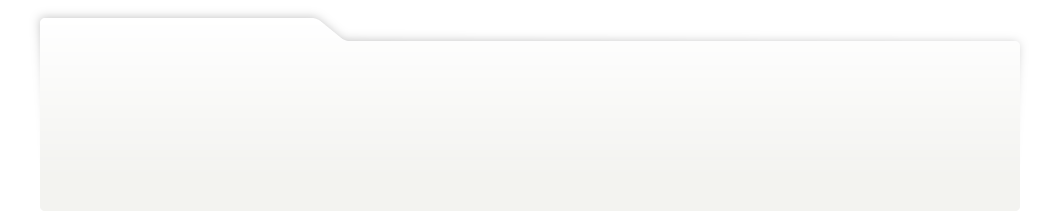
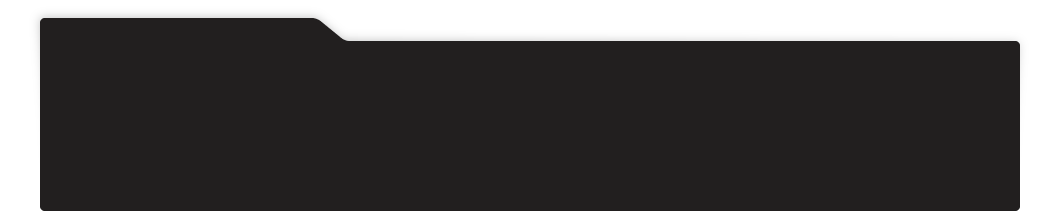
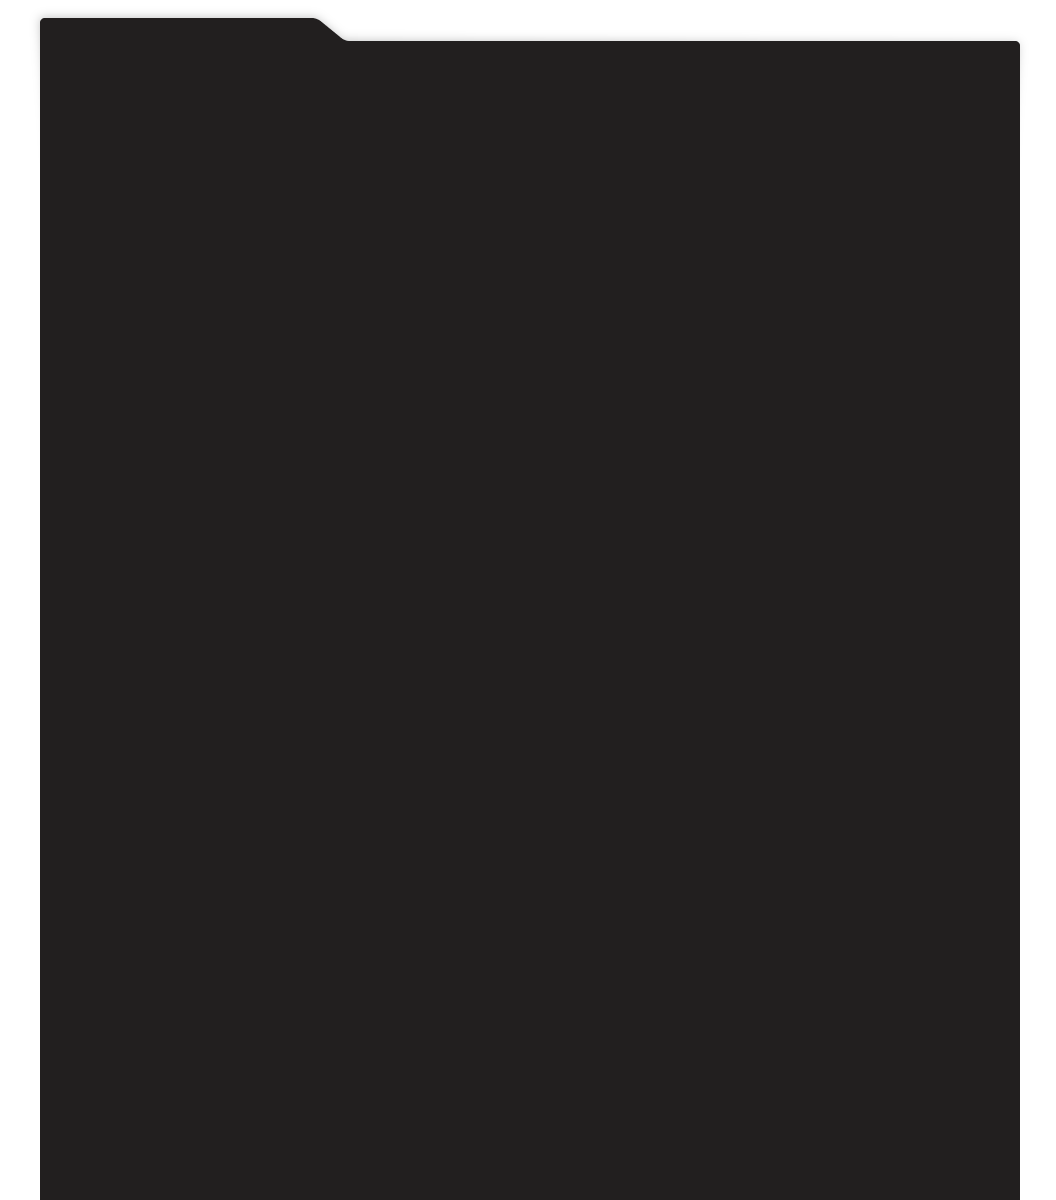
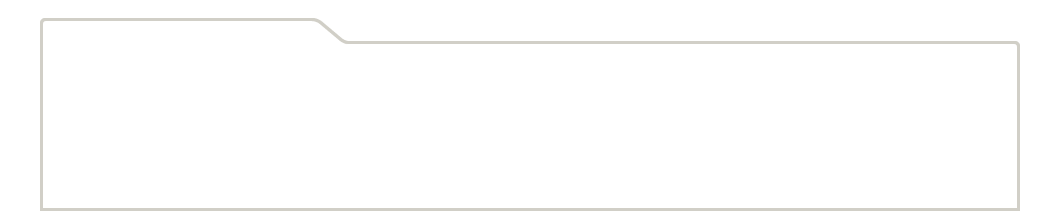
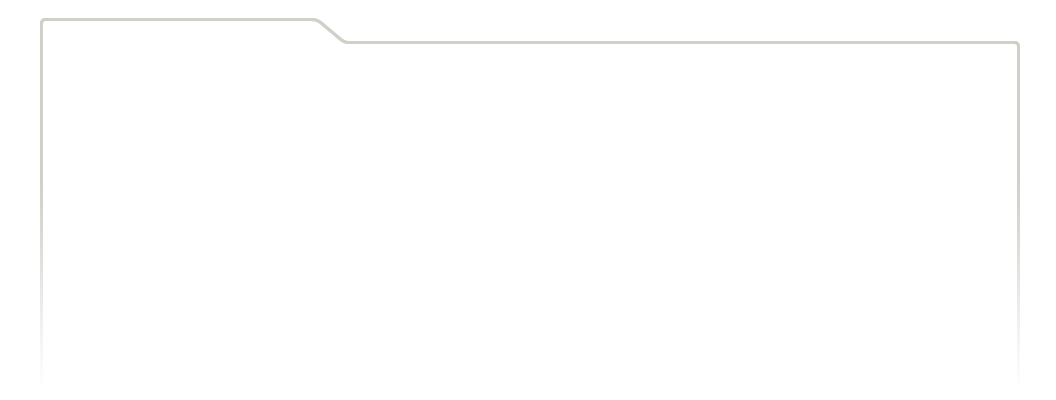
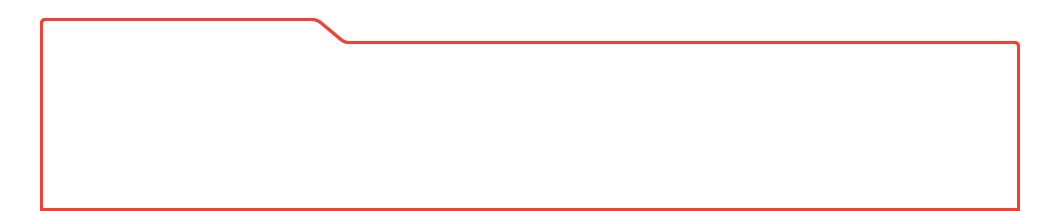
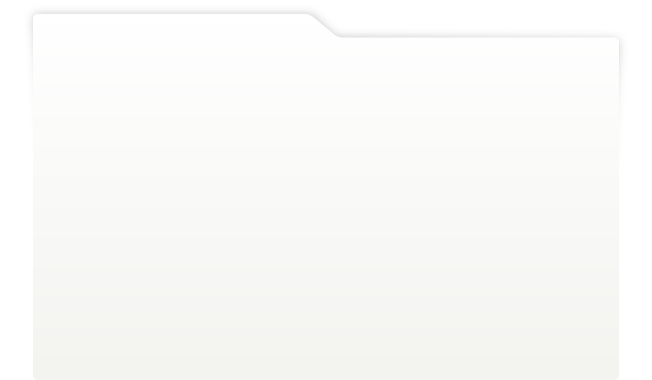
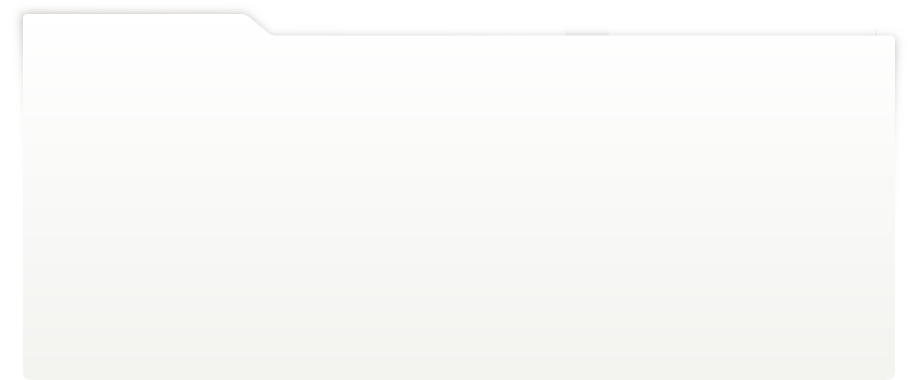
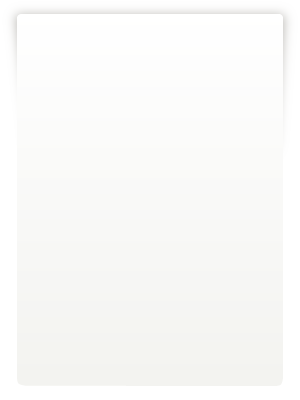
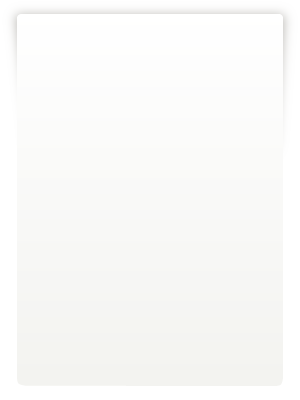
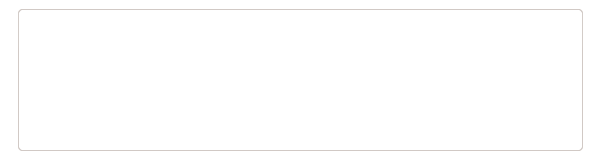
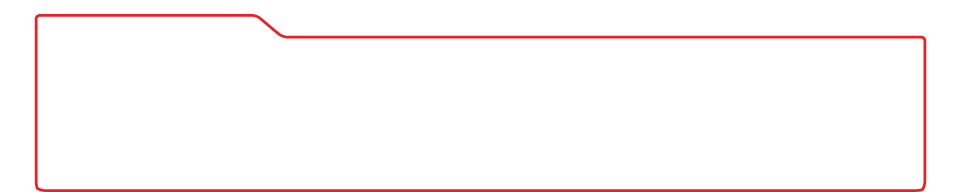
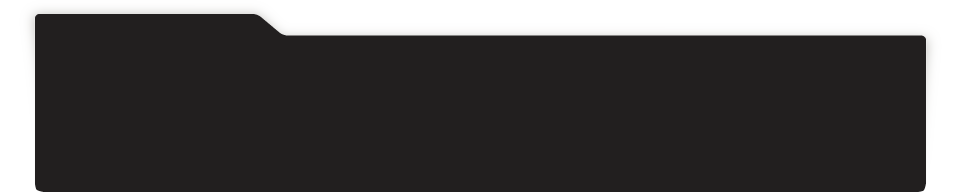
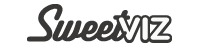
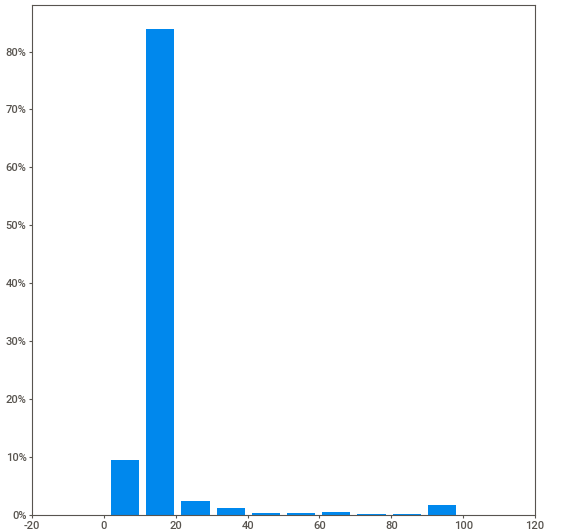
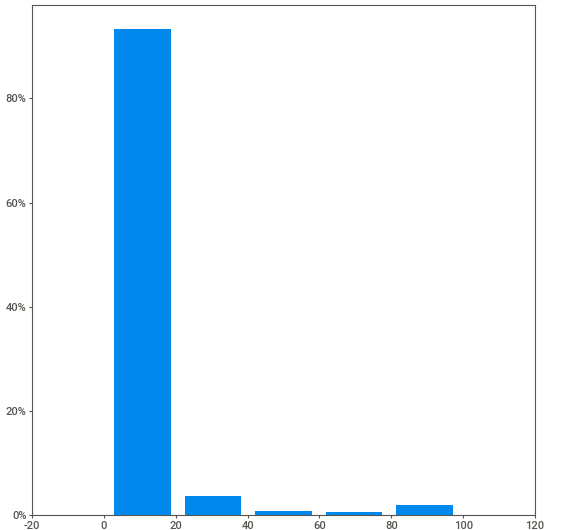
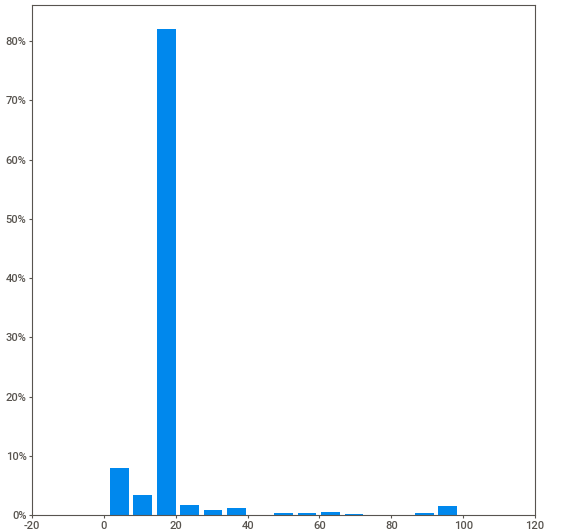
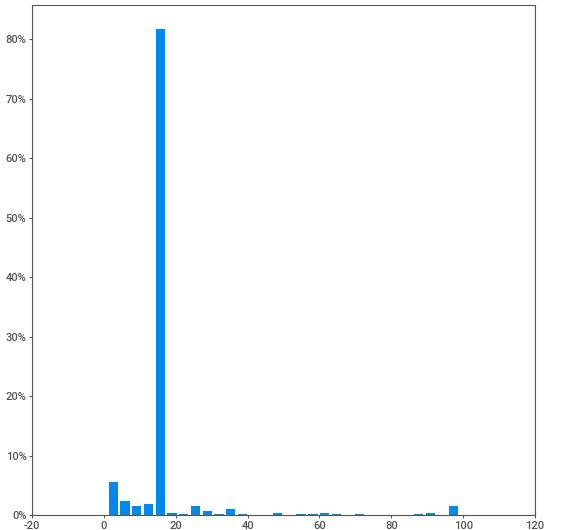
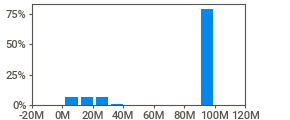
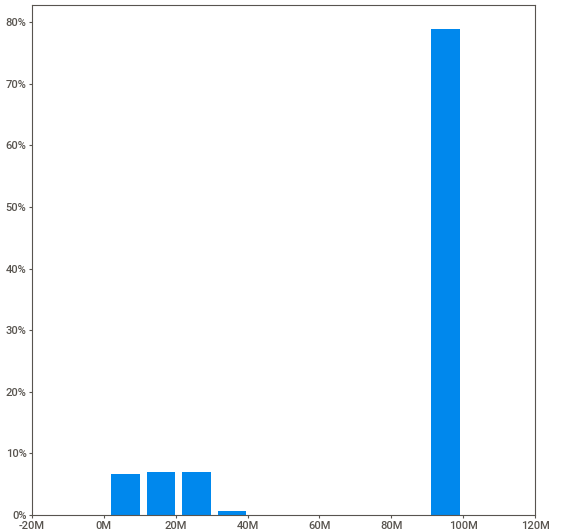
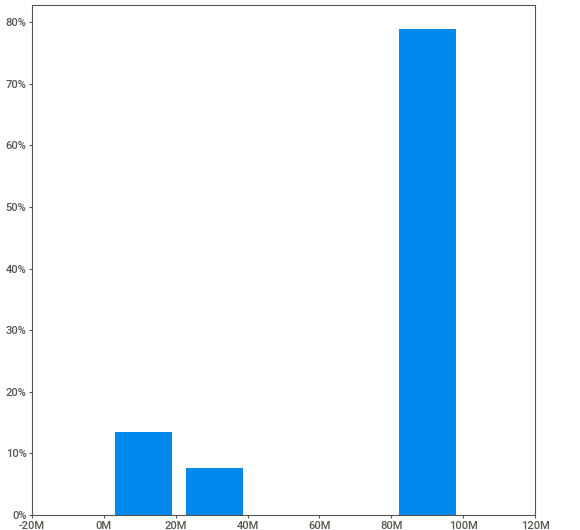
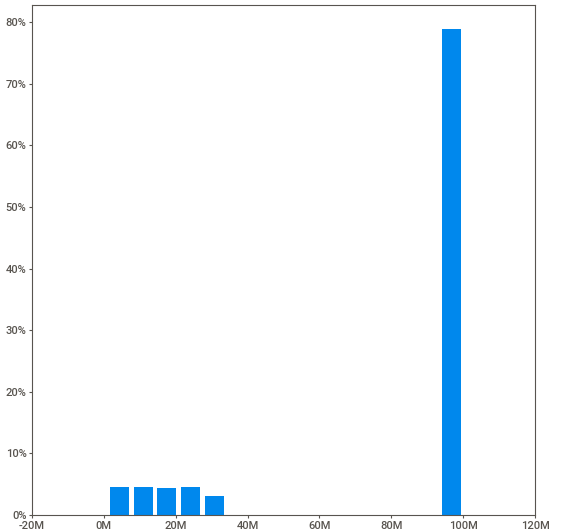
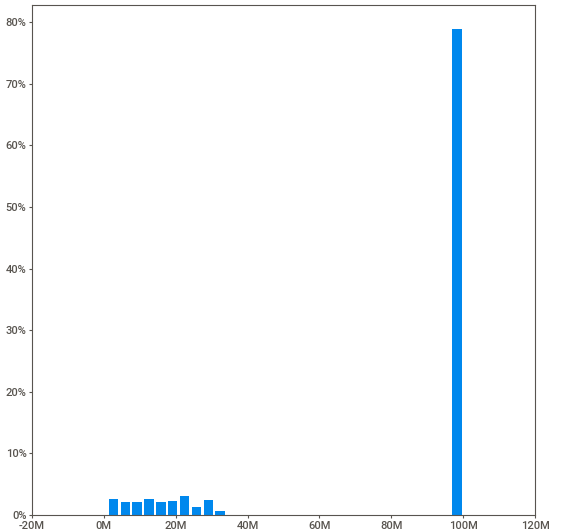
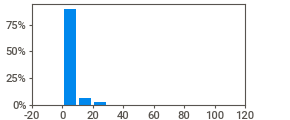
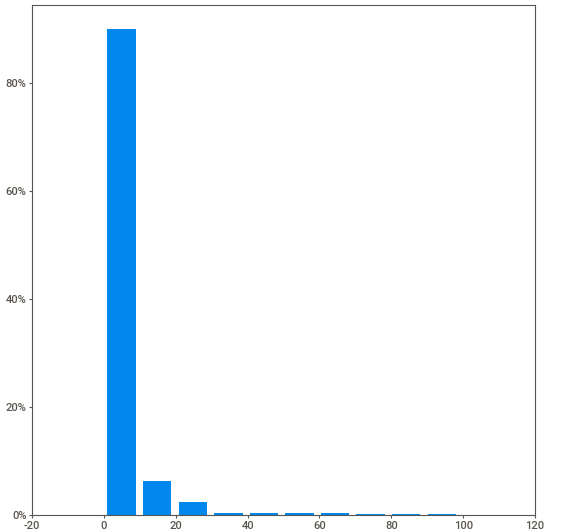
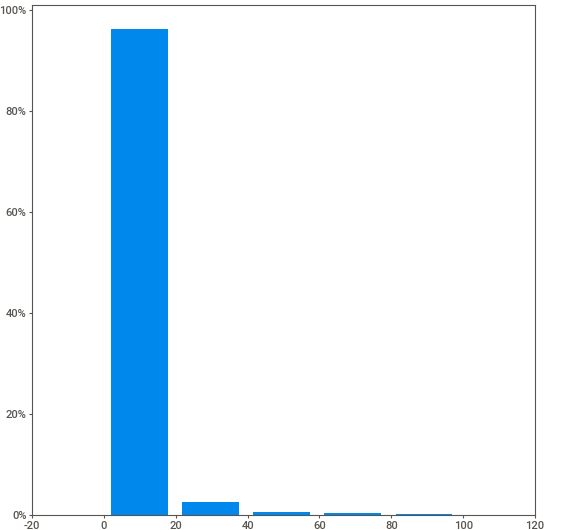
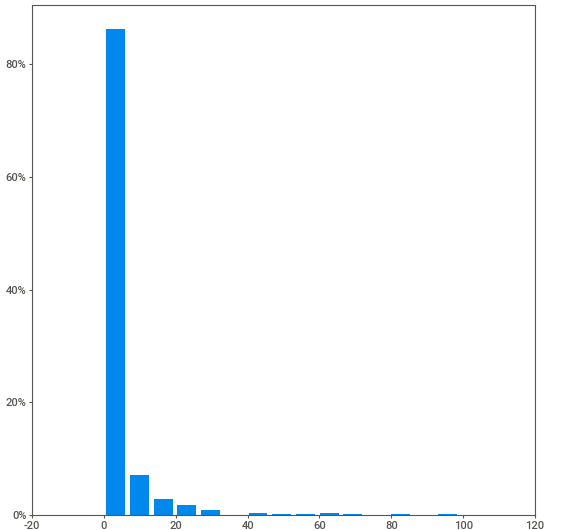
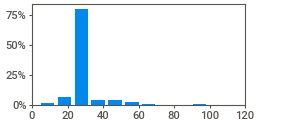
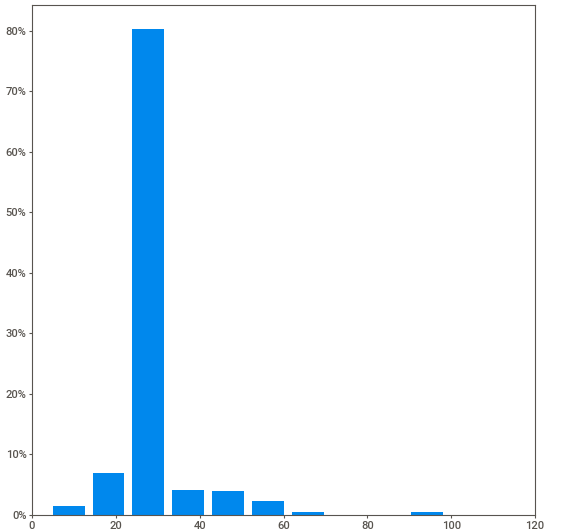
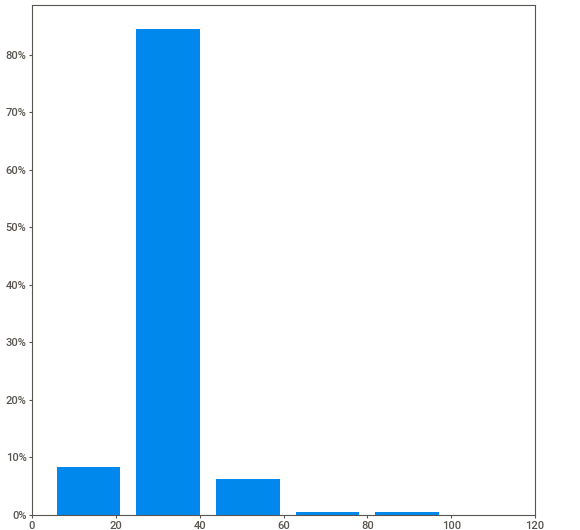
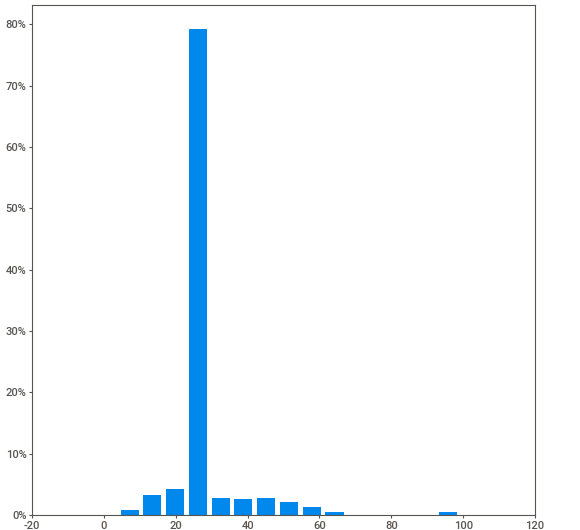
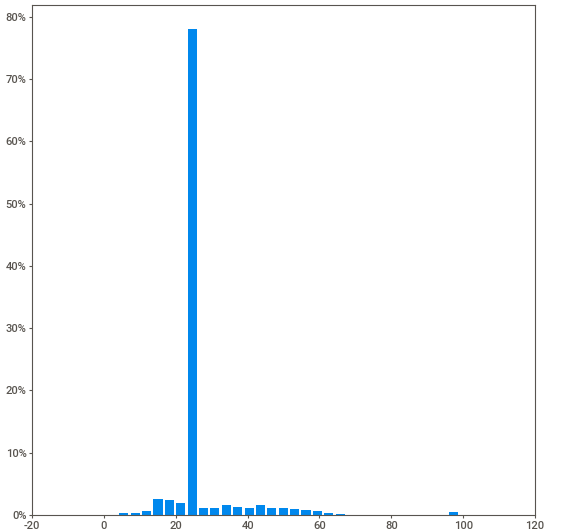
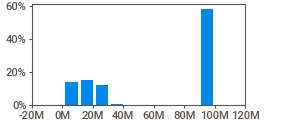
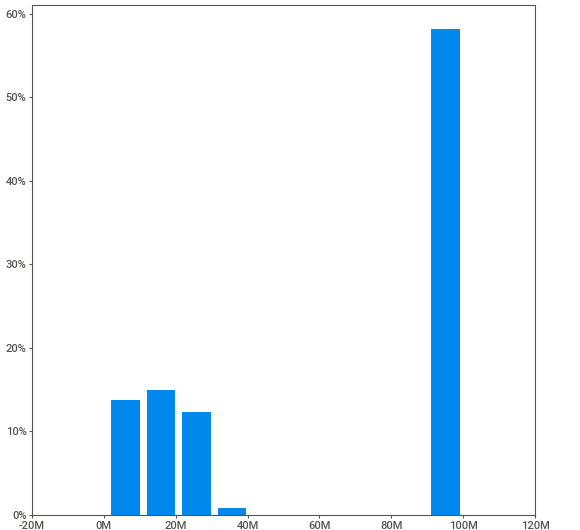
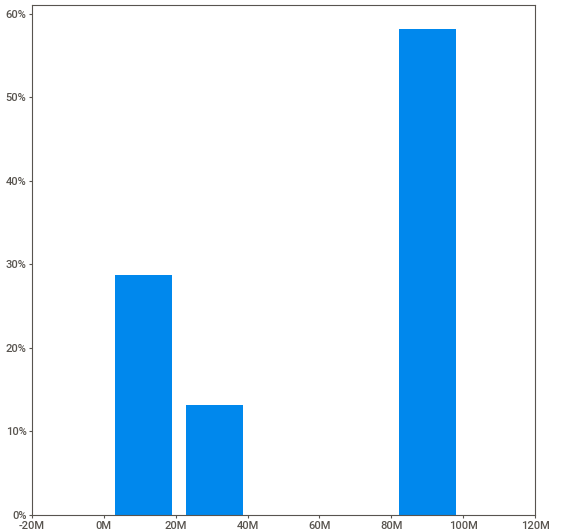
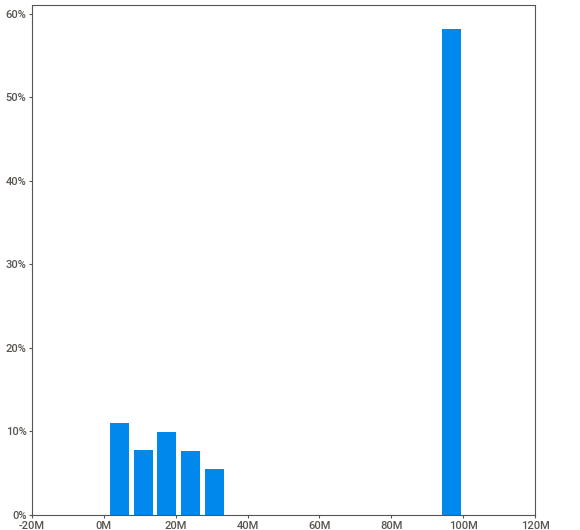
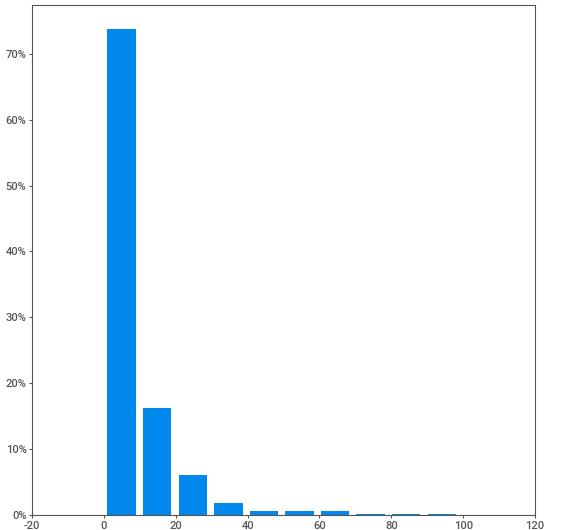
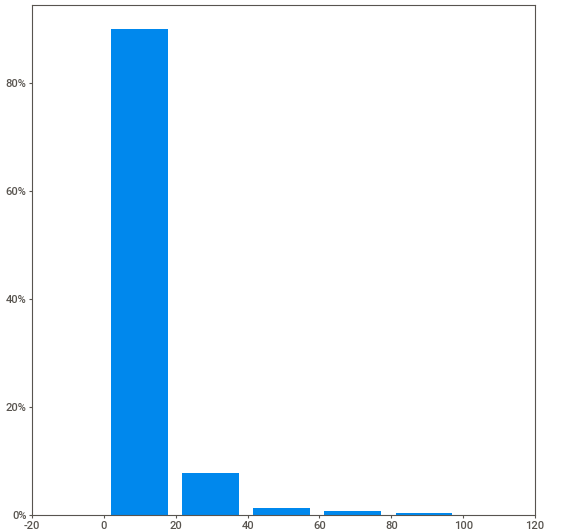
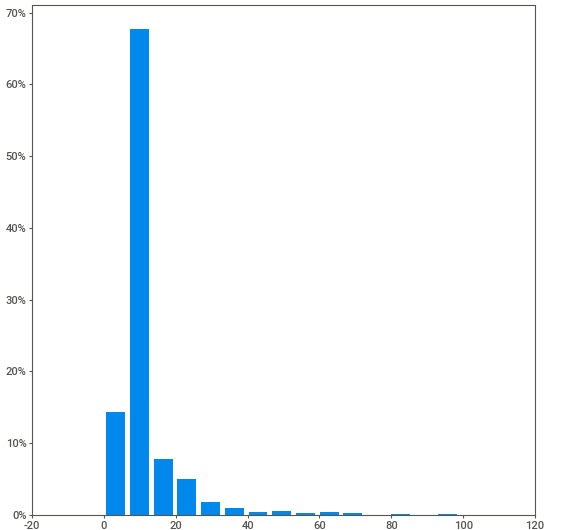
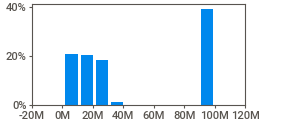
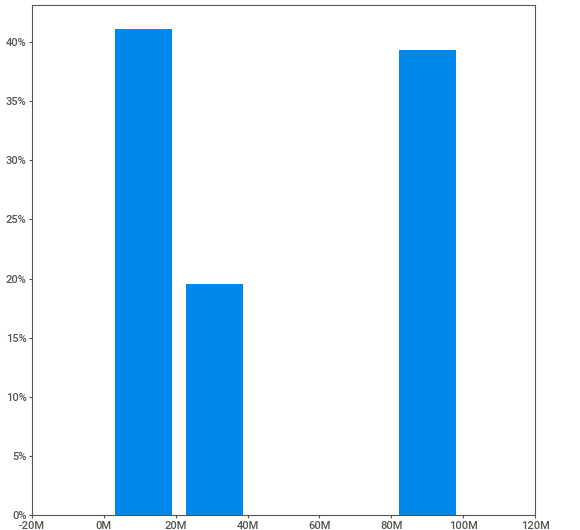
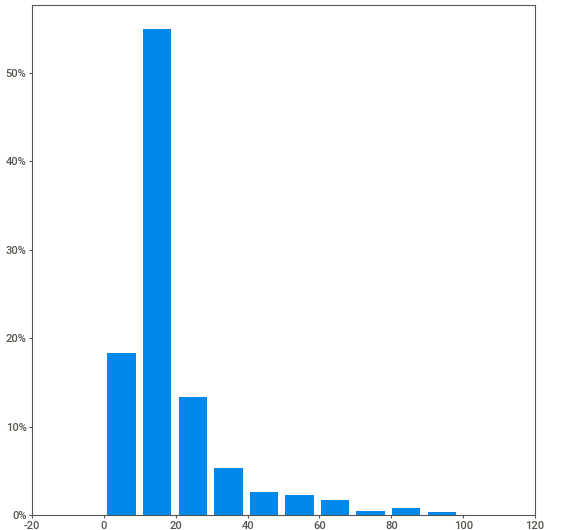
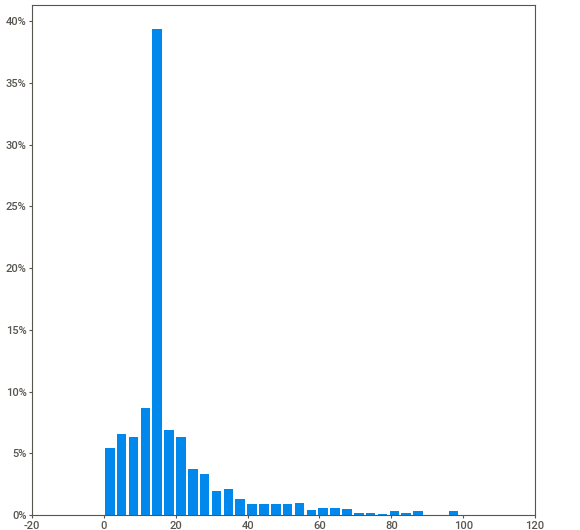
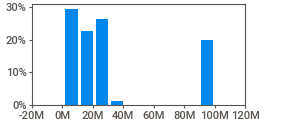
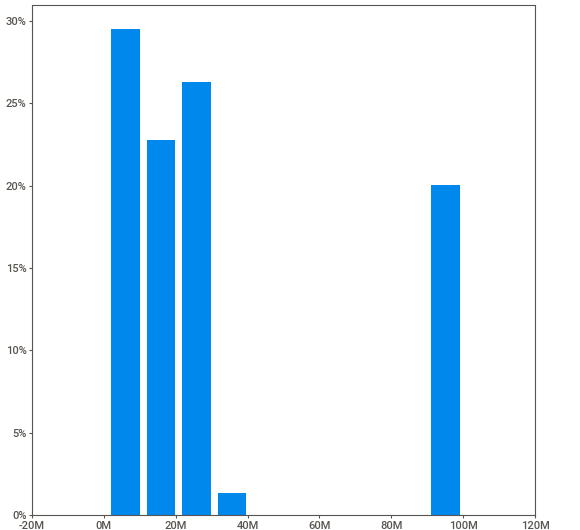
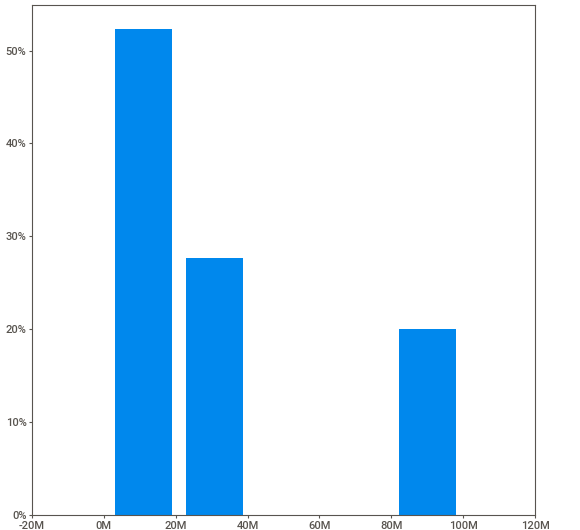
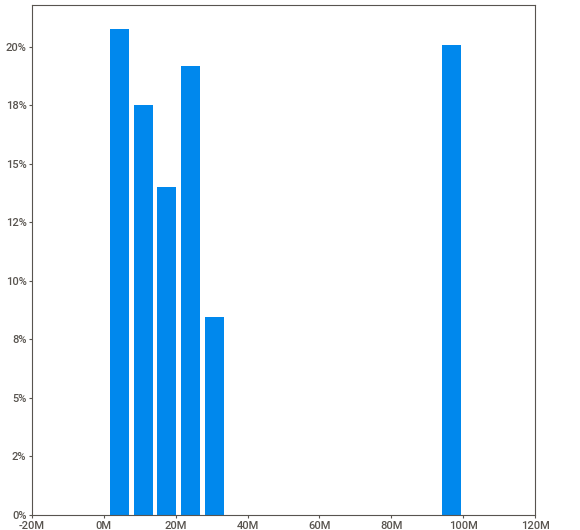
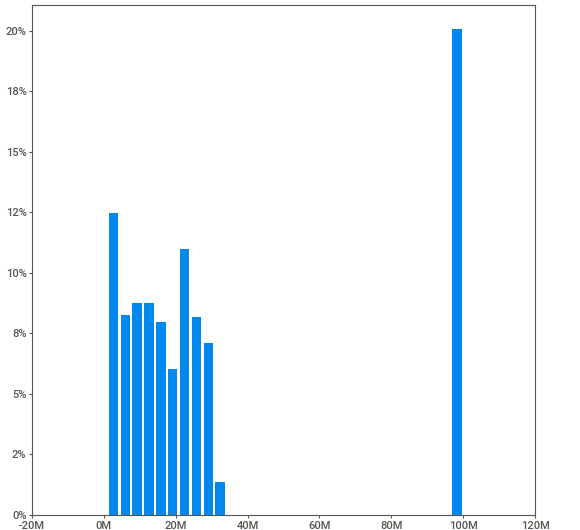
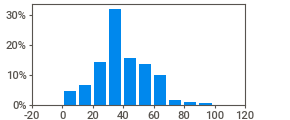
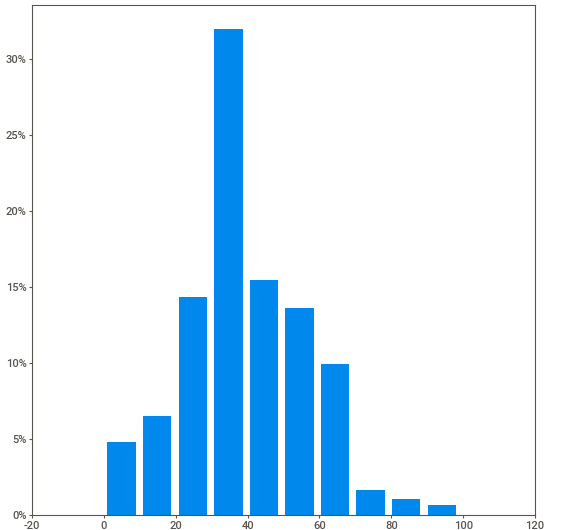
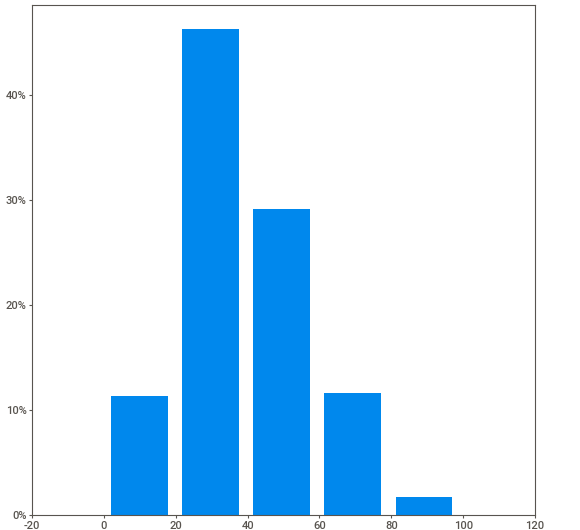
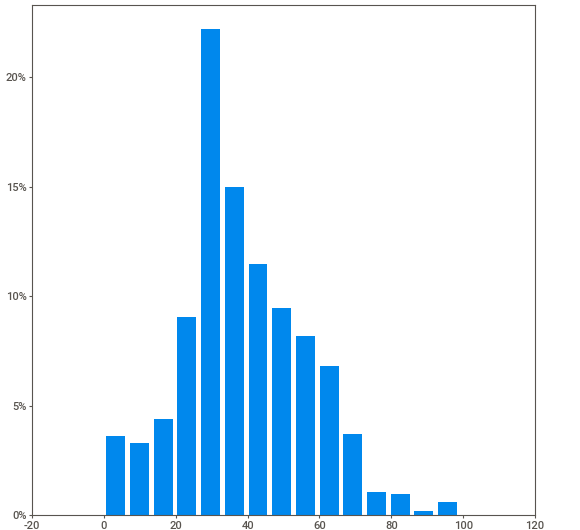
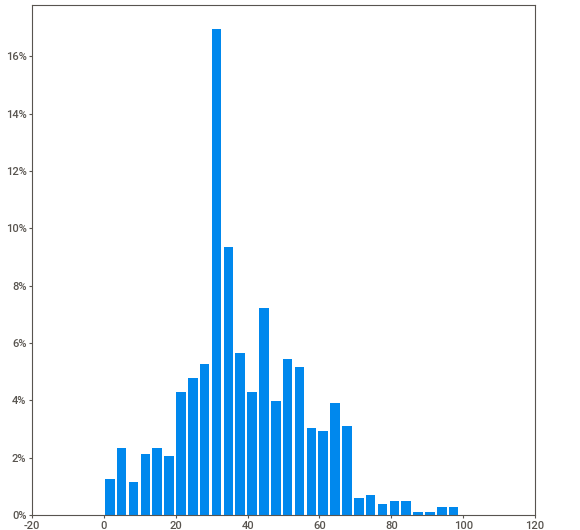
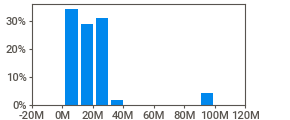
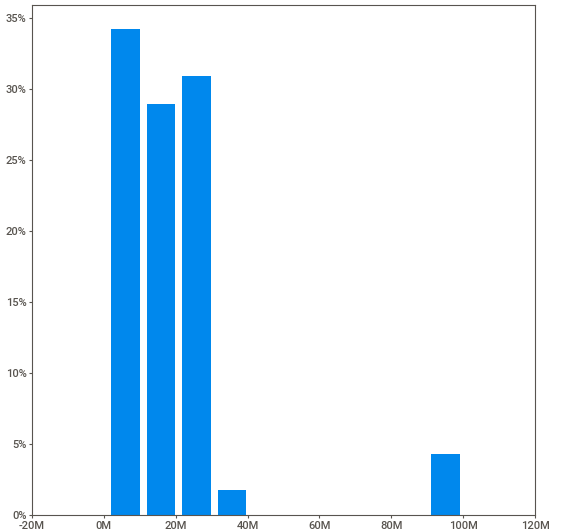
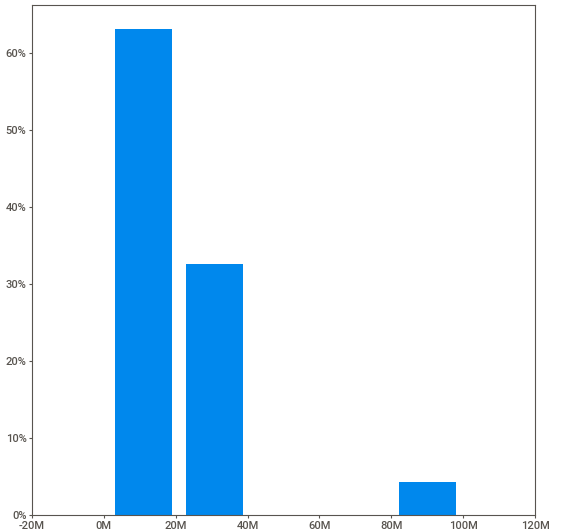
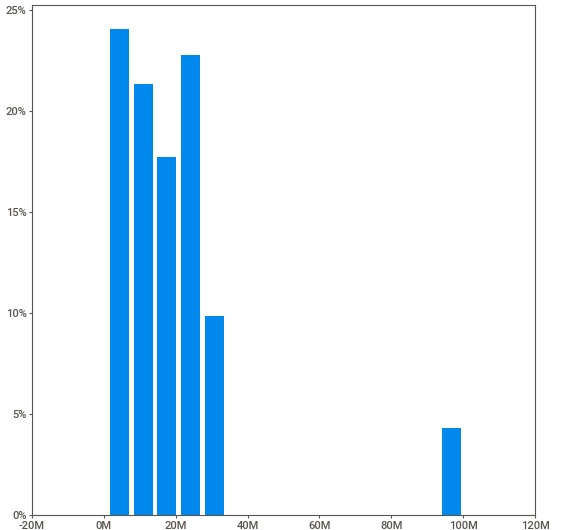
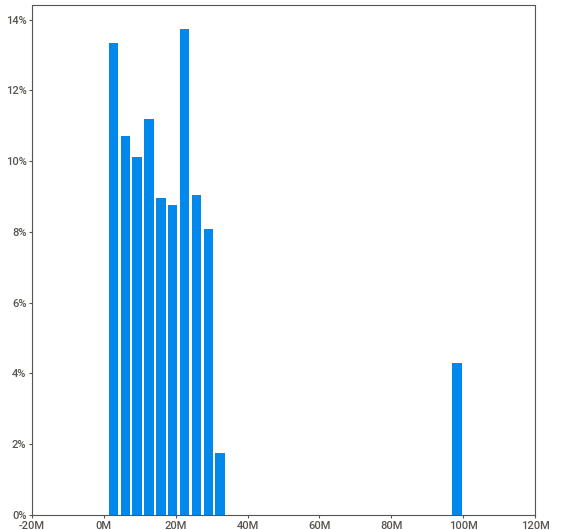
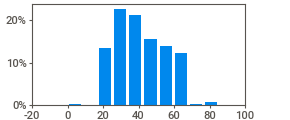
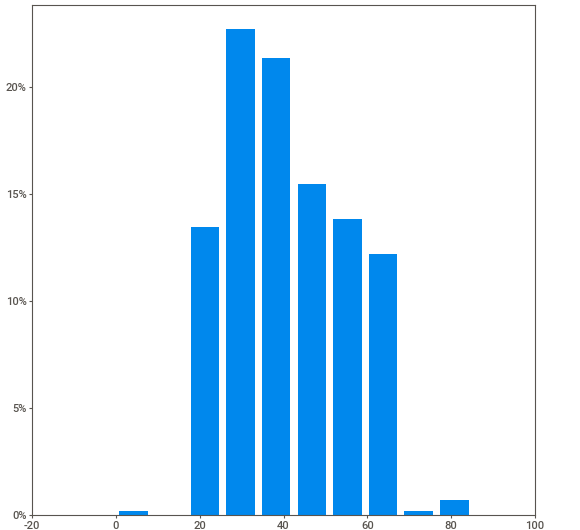
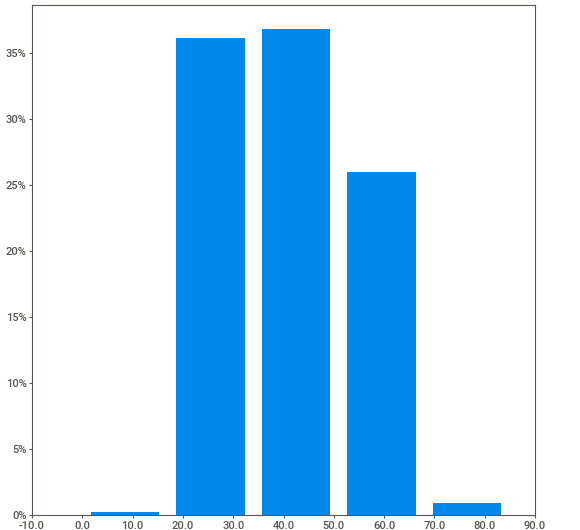
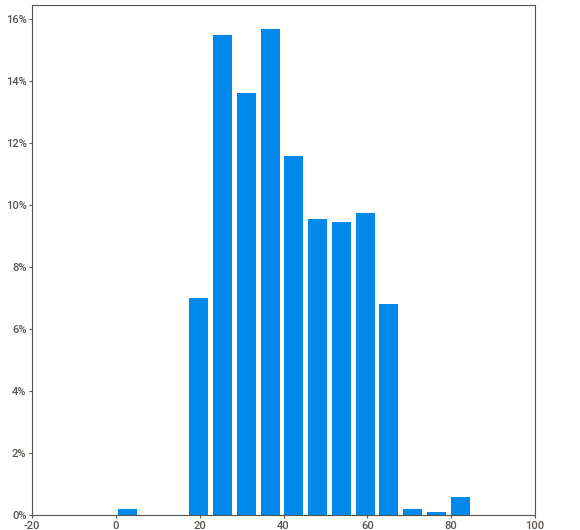
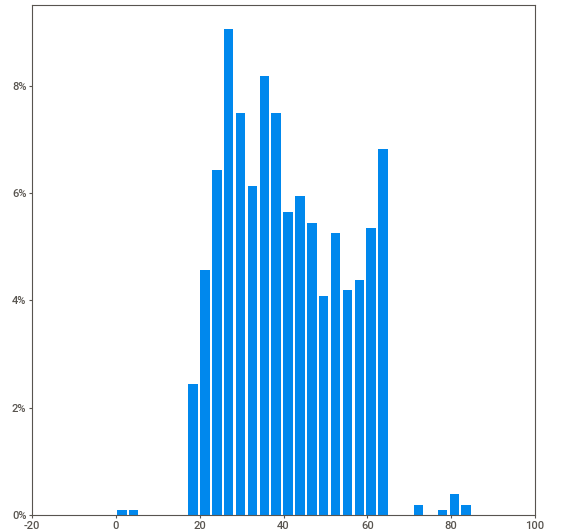
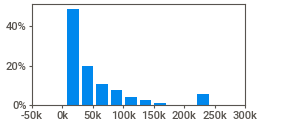
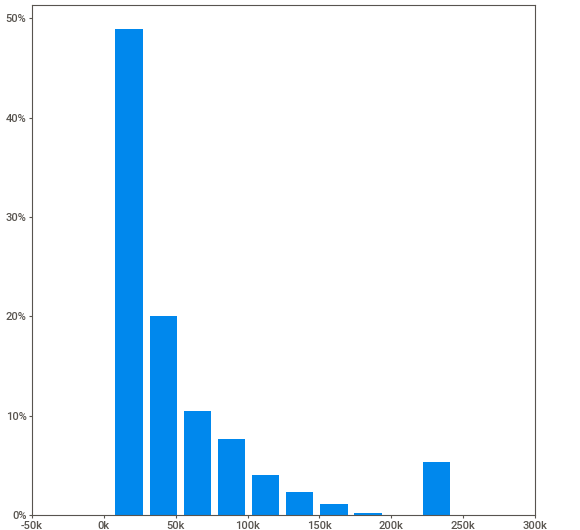
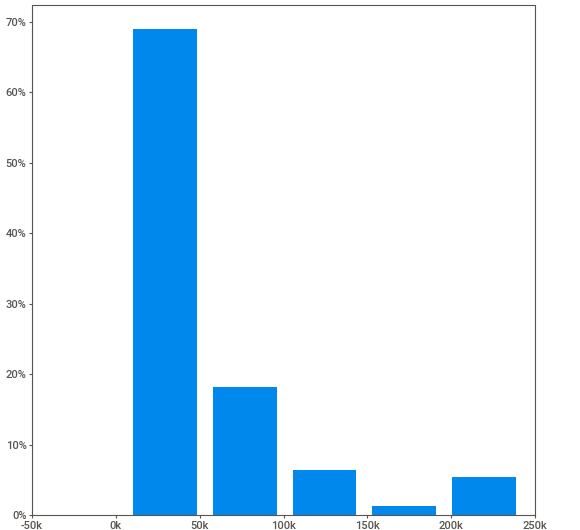
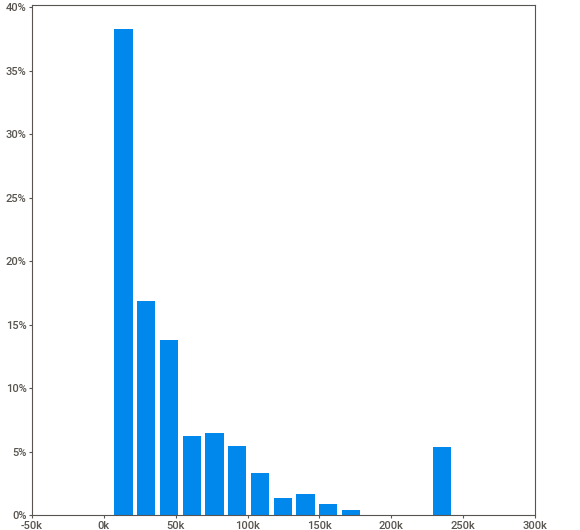
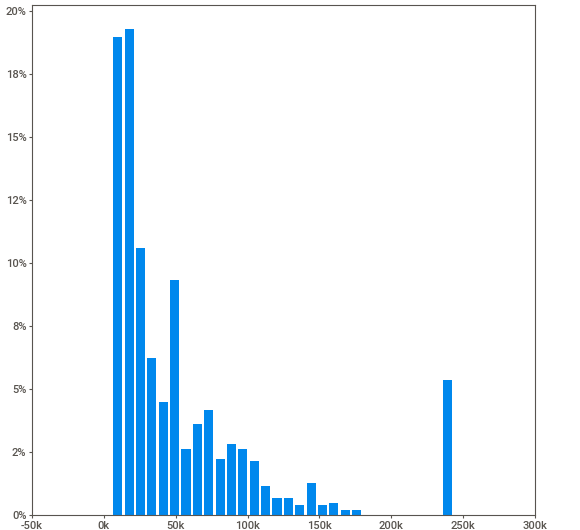
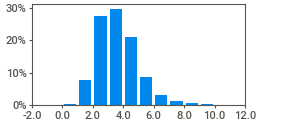
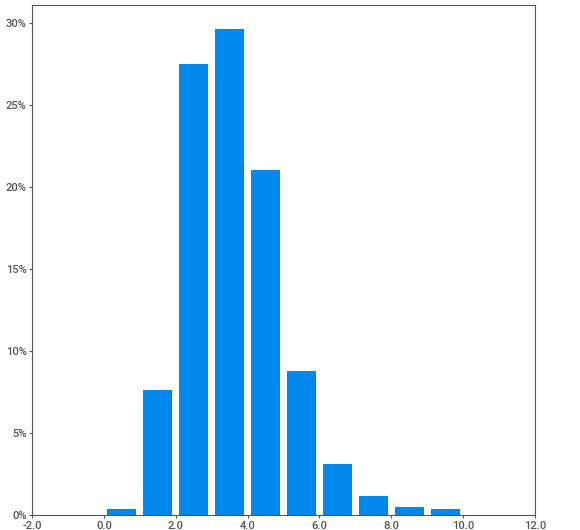
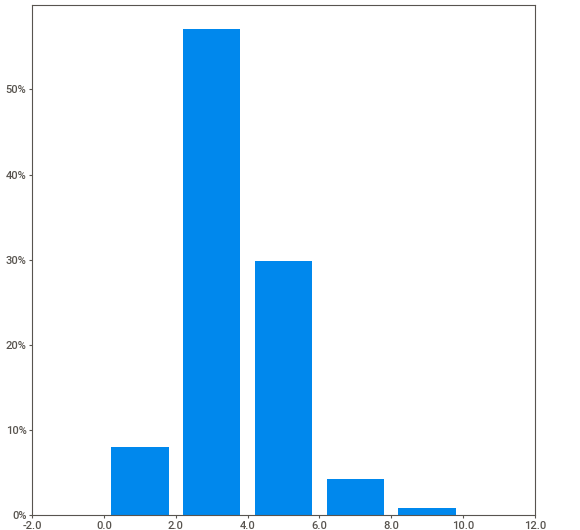
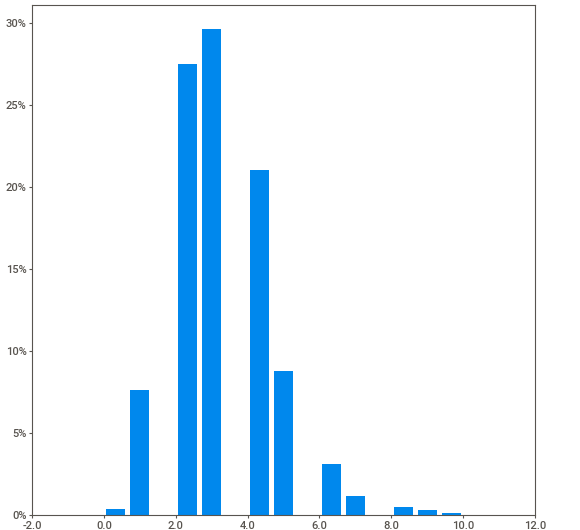
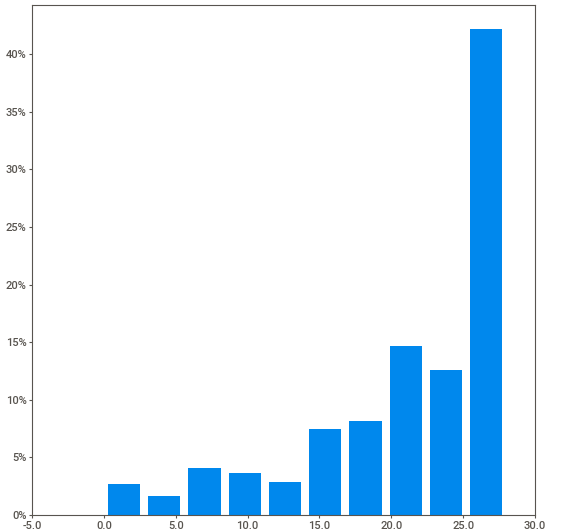
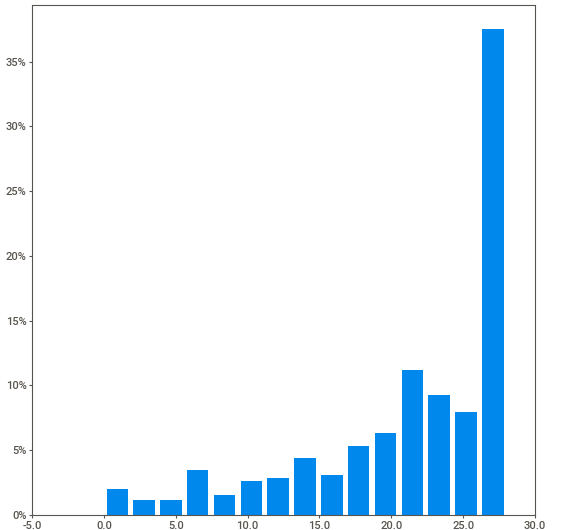
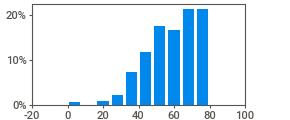
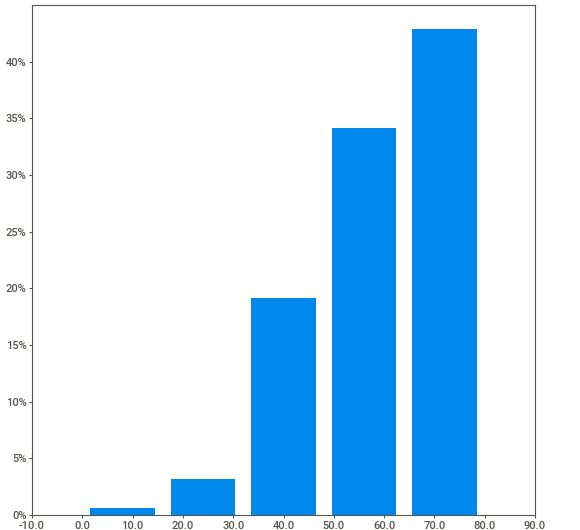
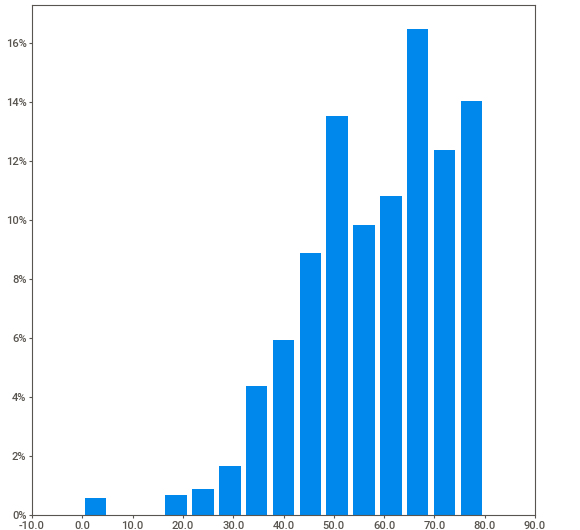
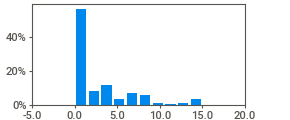
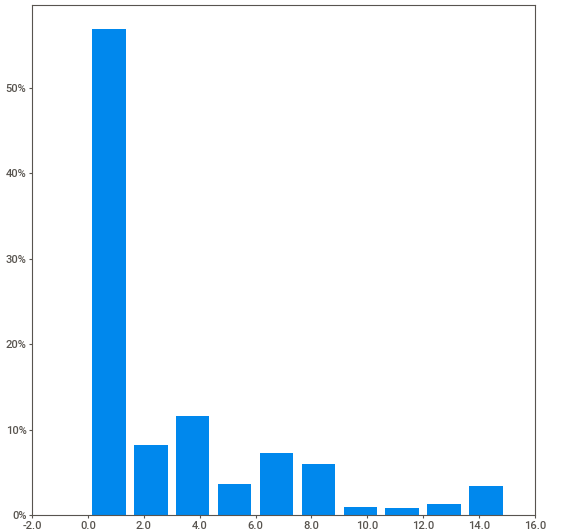
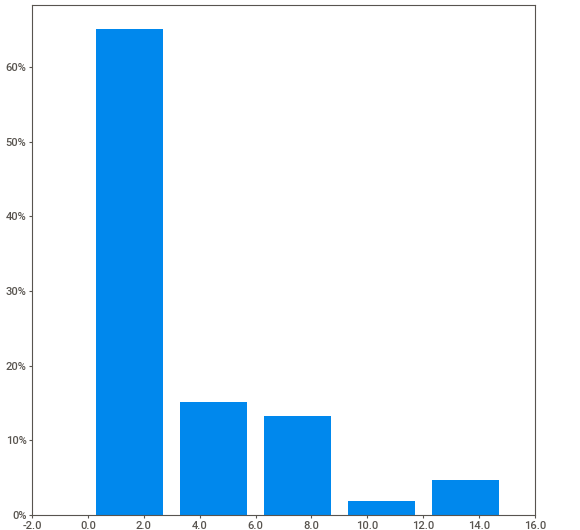
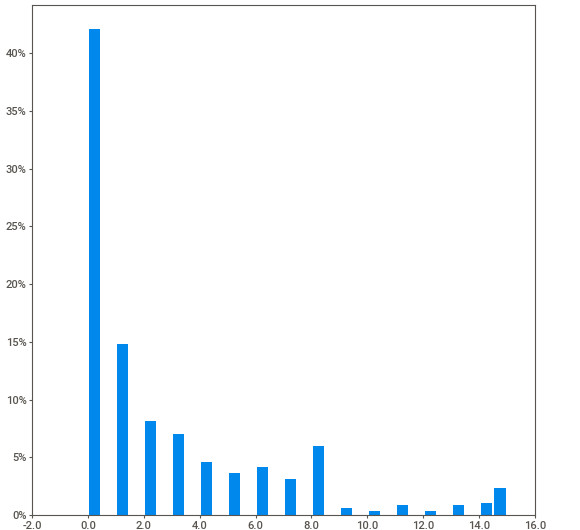
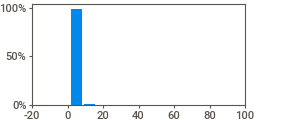
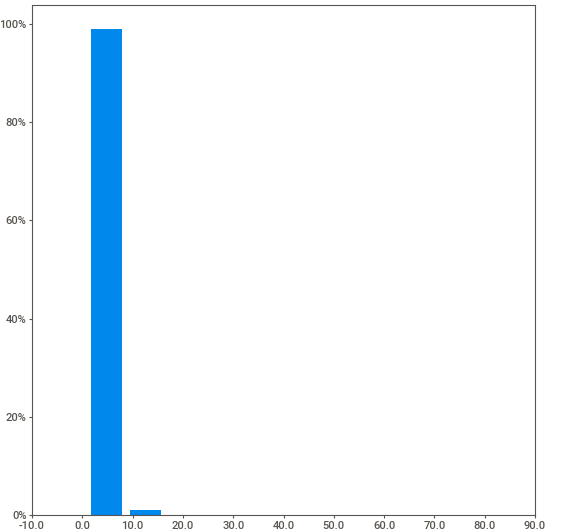
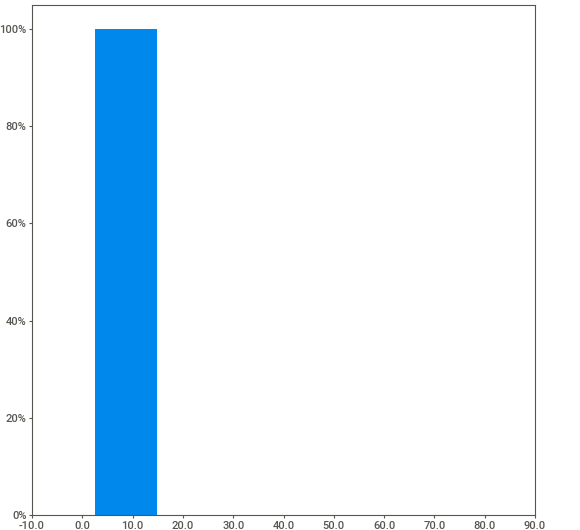
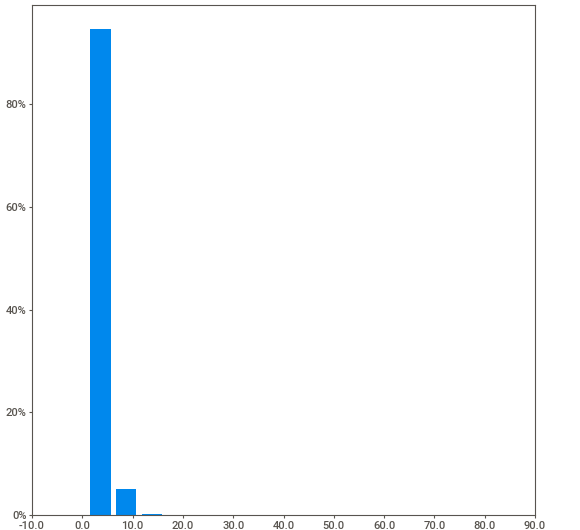
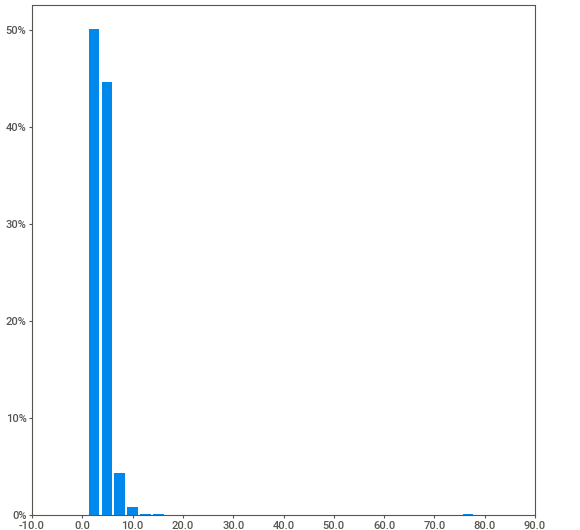
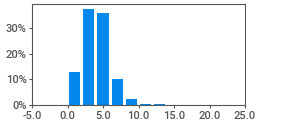
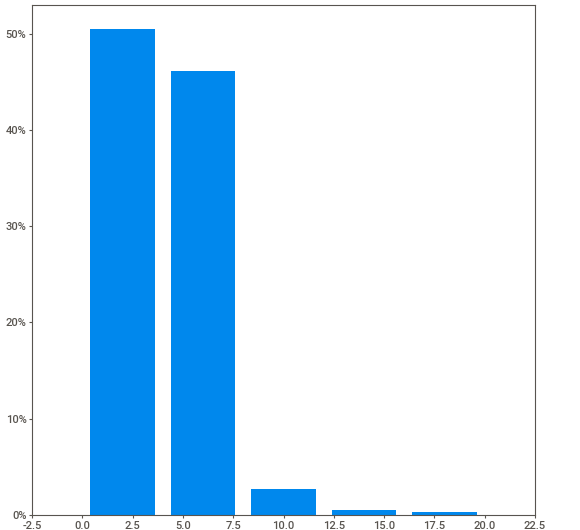
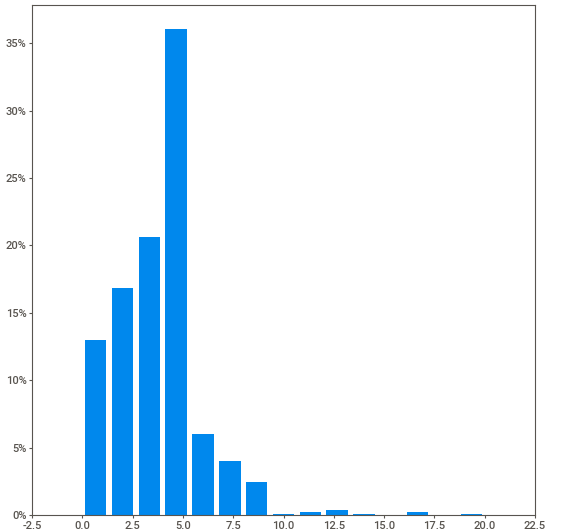
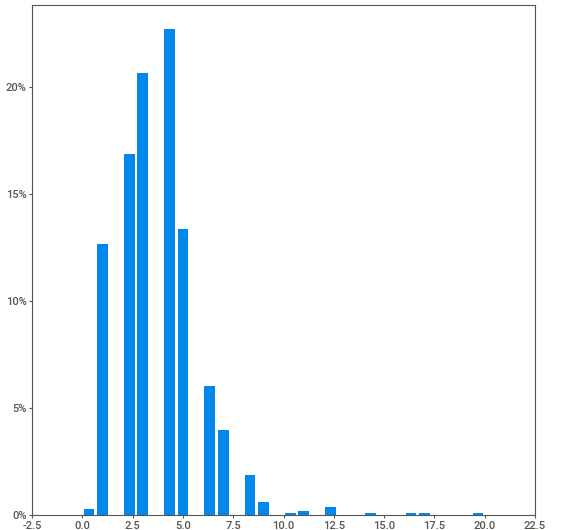
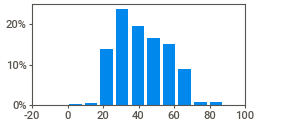
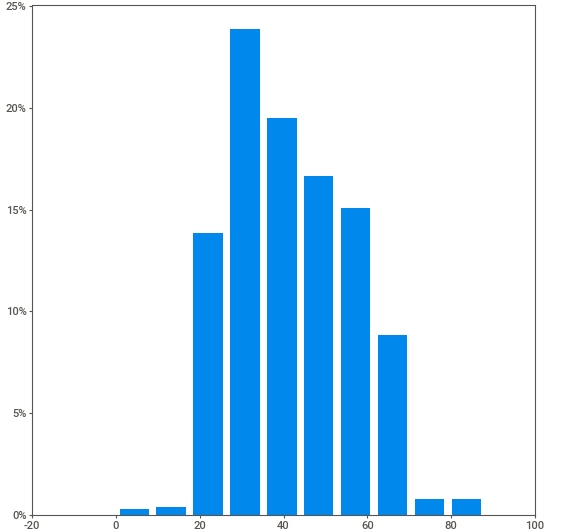
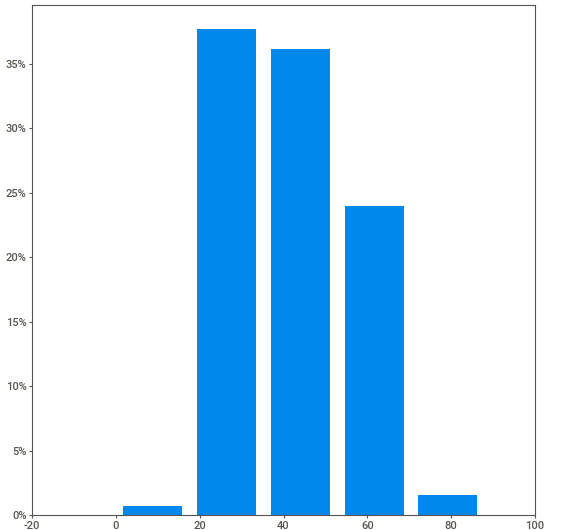
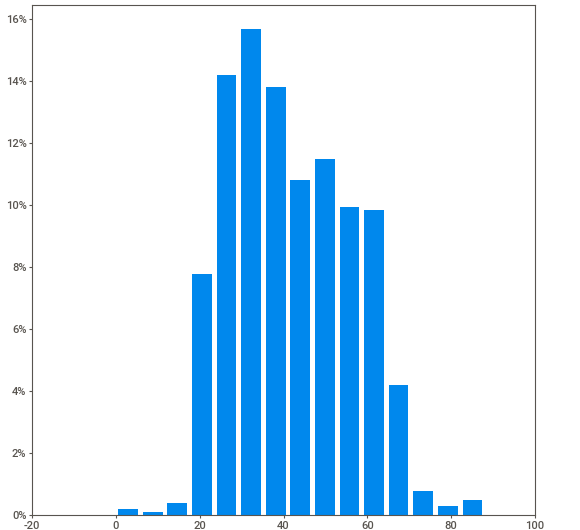
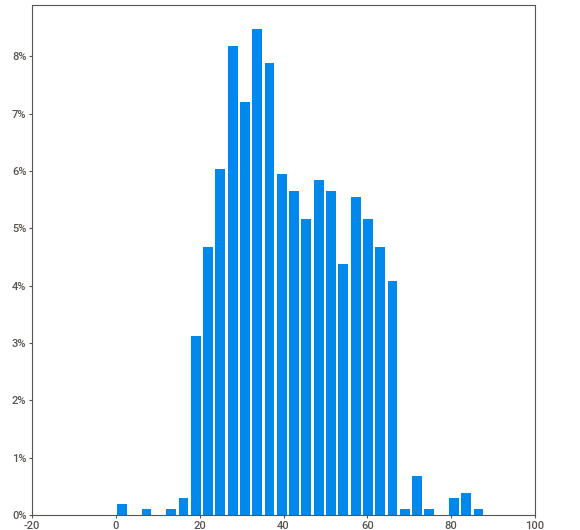
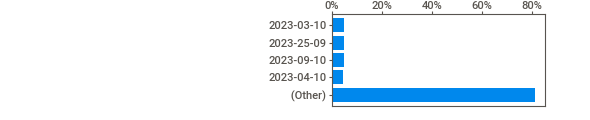
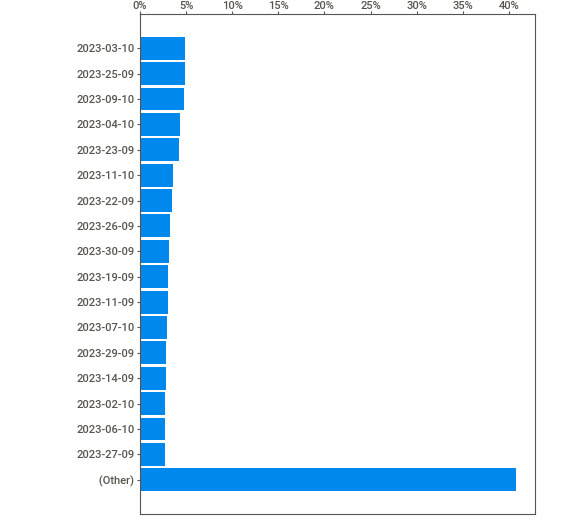
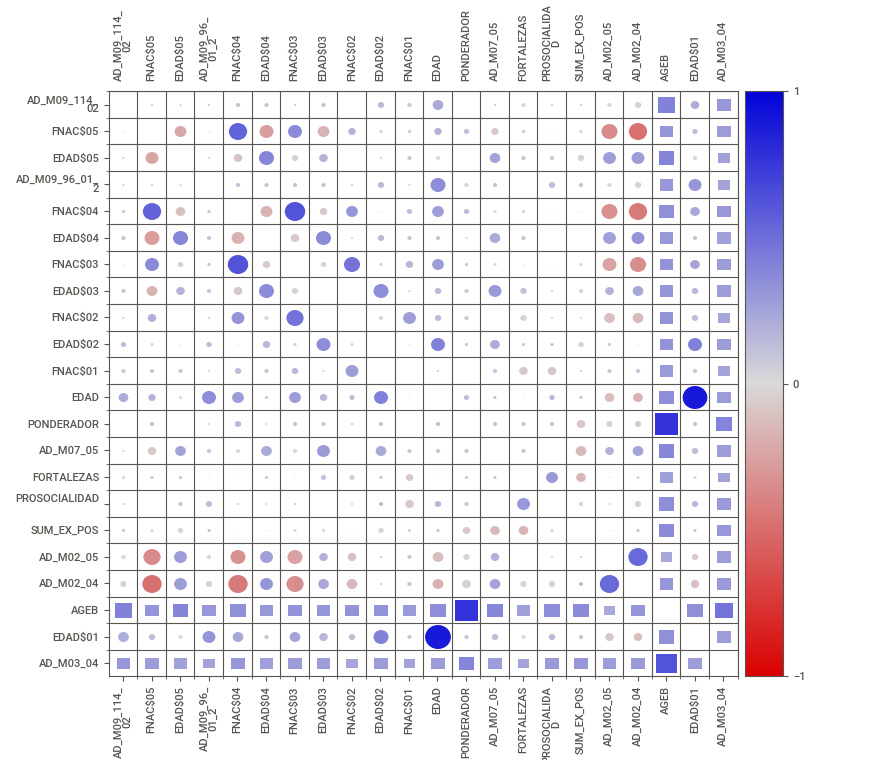
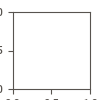

In [91]:
report.show_notebook()

In [92]:
# Guardamos el reporte en un srchivo html
report.show_html('sweetviz_report_DF_num.html')

Report sweetviz_report_DF_num.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [364]:
# Vemos que hay algunas variables de tipo categórico con Dtype "object"

X_train[num_lst].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 512 to 684
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_M09_114_01   1027 non-null   object 
 1   AD_M09_114_02   1027 non-null   float64
 2   FNAC$05         1027 non-null   float64
 3   EDAD$05         1027 non-null   float64
 4   AD_M09_96_01_2  1027 non-null   float64
 5   FNAC$04         1027 non-null   float64
 6   EDAD$04         1027 non-null   float64
 7   FNAC$03         1027 non-null   float64
 8   EDAD$03         1027 non-null   float64
 9   FNAC$02         1027 non-null   float64
 10  EDAD$02         1027 non-null   float64
 11  FNAC$01         1027 non-null   float64
 12  EDAD            1027 non-null   float64
 13  UPM             1027 non-null   object 
 14  PONDERADOR      1027 non-null   float64
 15  AD_M07_05       1027 non-null   float64
 16  FORTALEZAS      1027 non-null   int64  
 17  PROSOCIALIDAD   1027 non-null   

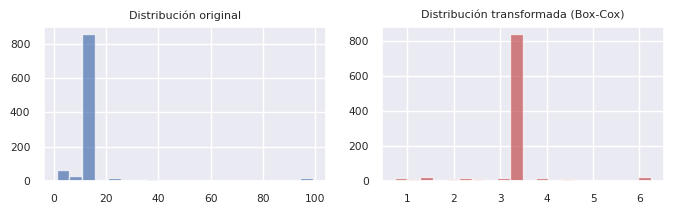

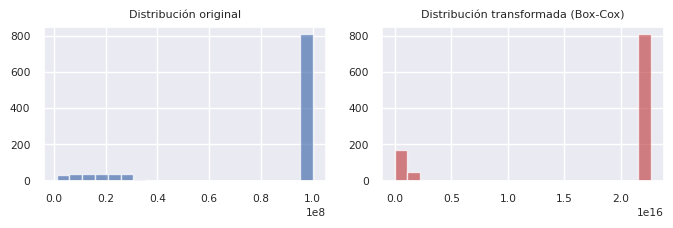

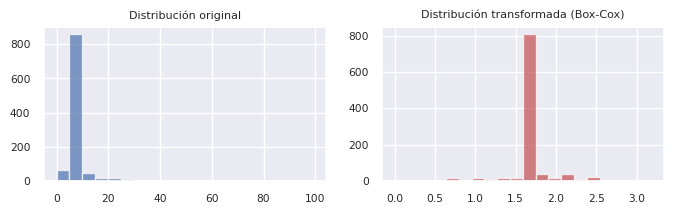

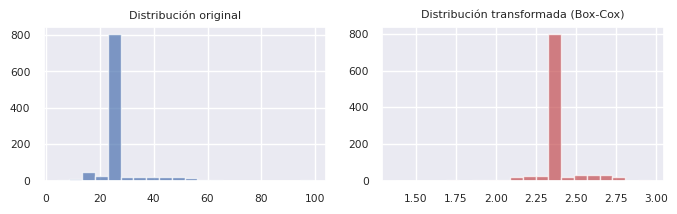

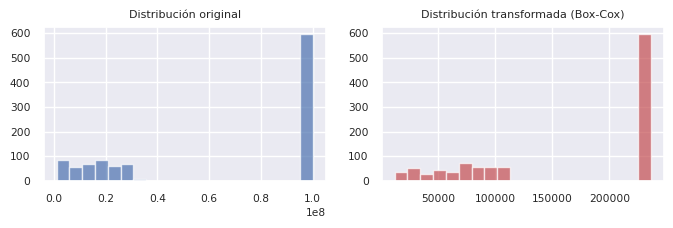

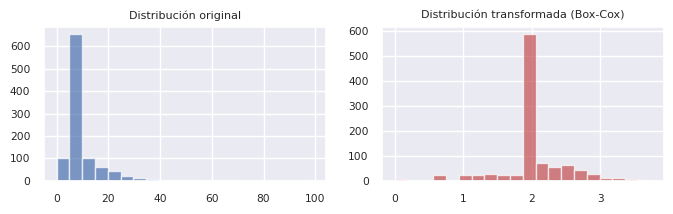

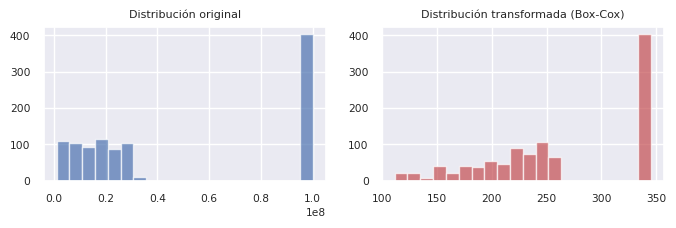

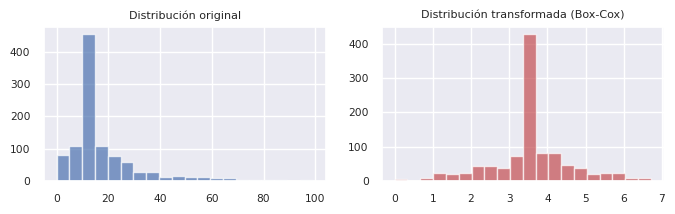

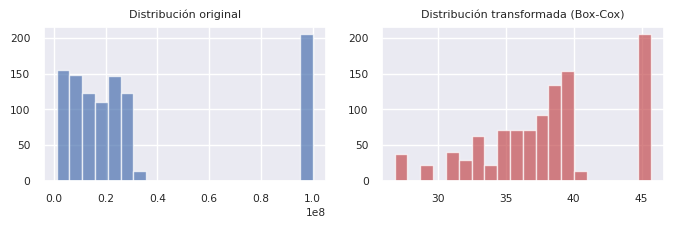

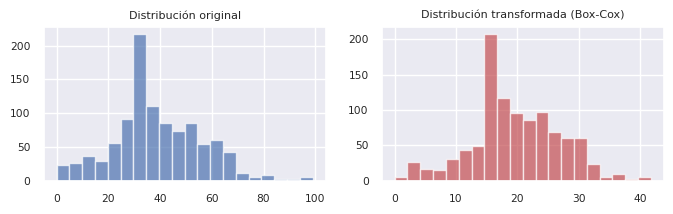

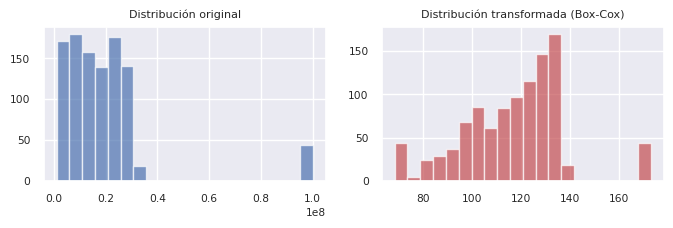

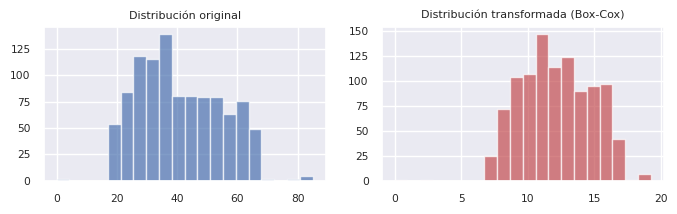

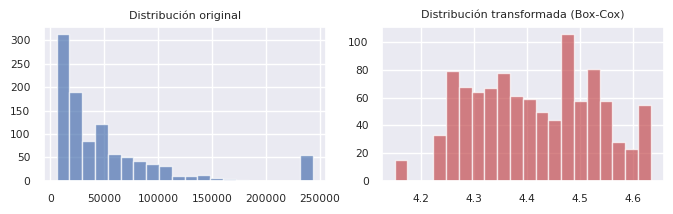

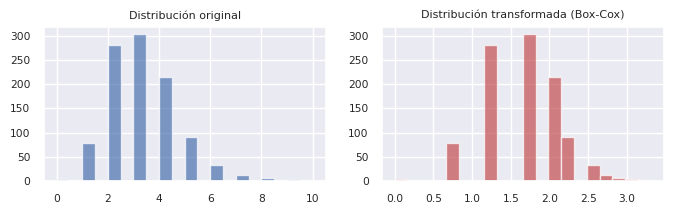

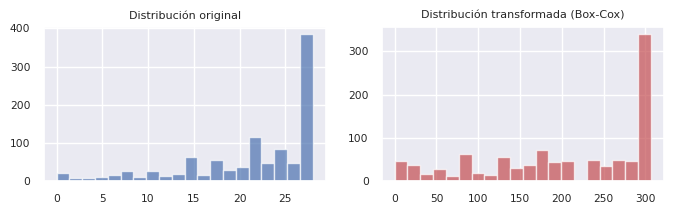

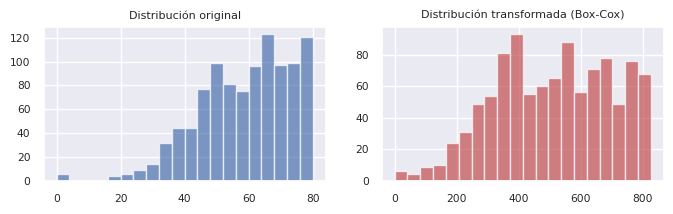

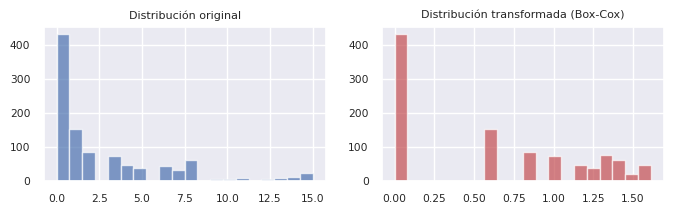

In [131]:
# Graficamos los histogramas de los valores numéricos antes y después de
# transformarlos usando el algoritmo Box-Cox

for k in range(len(num_var)):
  transformed_data, lambda_value = boxcox(X_train[num_var[k]] + 1)  # Se suma 1 para manejar valores no positivos

# Creamos histogramas para comparar la distribución antes y después de la transformación
  fig, axs = plt.subplots(1, 2, figsize=(8, 2))
  axs[0].hist(X_train[num_var[k]], bins=20, color='b', alpha=0.7)
  axs[0].set_title('Distribución original', fontsize = 8 )
  axs[1].hist(transformed_data, bins=20, color='r', alpha=0.7)
  axs[1].set_title('Distribución transformada (Box-Cox)', fontsize = 8)
  plt.show()

In [671]:
# Aplicamos Ordinal Encoding a las variables que tienen de 3 a 10 categorías,
# Estas corresponden a las variables ordinales de nuestro dataset

ord_lst = []

for col in X_train:
    if 2 < X_train[col].nunique() < 11 :
        ord_lst.append(col)

In [672]:
from feature_engine.encoding import OrdinalEncoder

enc = OrdinalEncoder(encoding_method="arbitrary", variables=ord_lst)

In [673]:
enc.fit(X_train.astype('object'))

OrdinalEncoder(encoding_method='arbitrary',
               variables=['AD_M09_111_13_2', 'AD_M09_111_11_2',
                          'AD_M09_96_01_3', 'AD_M09_96_01_7', 'AD_M09_96_01_6',
                          'AD_M06_03', 'AD_M08_26', 'AD_M06_02', 'AD_M06_04',
                          'AD_M09_111_05_2', 'AD_M05_03', 'AD_M09_111_10_2',
                          'AD_M07_49', 'Seguridad alimentaria 3', 'AD_M07_25',
                          'AD_M09_111_06_2', 'AD_M09_111_01_2', 'AD_M05_05',
                          'AD_M07_13', 'AD_M09_111_02_2', 'AD_M09_111_03_2',
                          'AD_M05_06', 'ESCOLARIDAD', 'AD_M13_121', 'AD_M08_36',
                          'AD_M08_37', 'AD_M08_38', 'AD_M08_35', 'Co_social_15',
                          'Co_social_11', ...])

In [674]:
X_train = enc.transform(X_train)

X_test = enc.transform(X_test)

In [675]:
X_train.head()

AD_M09_111_13_2  AD_M09_111_11_2  AD_M09_114_03 AD_M09_114_01  \
512                0                0            1.0     OMEPRAZOL   
320                0                1            2.0   PARACETAMOL   
608                0                0            2.0   PARACETAMOL   
195                0                0            2.0   PARACETAMOL   
721                0                2            2.0   PARACETAMOL   

     AD_M09_114_02     FNAC$05  LEER$05  EDAD$05  DISCAPACIDAD$05  ESPANOL$05  \
512            8.0  99999999.0      1.0      6.0              2.0         1.0   
320           15.0  99999999.0      1.0      6.0              2.0         1.0   
608           15.0   2062009.0      1.0     14.0              2.0         1.0   
195           15.0  12082020.0      2.0      3.0              2.0         1.0   
721           15.0  99999999.0      1.0      6.0              2.0         1.0   

     ...  ACE1  ESPANOL$01  ACE2  ACE3  ACE4  ACE5  ACE6  ACE7  ACE8  BINOMIO  
512  ...     0           1     0     0     0     0     0     0     0        0  
320  ...     0           1     0     0     0     1     1     0     1        0  
608  ...     0           1     0     0     0     0     0     1     0        1  
195  ...     0           1     0     0     1     0     0     0     0        1  
721  ...     0           1     0     0     1     0     0     1     0        0  

[5 rows x 343 columns]

In [676]:
# Creamos una lista para hacer OHE basado en variables binarias así como las
# que tienen arriba de 10 categorías, para las  que dejaremos la categoría
# con mayor frecuencia

freq_lst = []

for col in X_train:
    if  2 < X_train[col].nunique()>10  :
        freq_lst.append(col)

In [678]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(top_categories=1, variables= freq_lst, drop_last_binary=True)

In [679]:
ohe_enc.fit(X_train.astype(object))

OneHotEncoder(drop_last_binary=True, top_categories=1,
              variables=['AD_M09_114_01', 'AD_M09_114_02', 'FNAC$05', 'EDAD$05',
                         'AD_M09_96_01_2', 'FNAC$04', 'EDAD$04', 'FNAC$03',
                         'EDAD$03', 'FNAC$02', 'EDAD$02', 'FNAC$01', 'EDAD',
                         'UPM', 'PONDERADOR', 'AD_M07_05', 'FORTALEZAS',
                         'PROSOCIALIDAD', 'SUM_EX_POS', 'AD_M02_05',
                         'AD_M02_04', 'AGEB', 'EDAD$01', 'AD_M03_06',
                         'AD_M03_05', 'AD_M03_04'])

In [680]:
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

In [629]:
# Usamos OHE para las variables de salida
ohe_enc_target = OneHotEncoder(top_categories=1, variables=list(y_train.columns),drop_last_binary=True,ignore_format=True)

In [630]:
ohe_enc_target.fit(y_train.astype(object))

OneHotEncoder(drop_last_binary=True, ignore_format=True, top_categories=1,
              variables=['Depresion', 'Ansiedad',
                         'TRANSTORNO_ESTRES POSTRAUMÁTICO',
                         'SOSPECHA DE ANOREXIA/BULIMIA'])

In [631]:
y_train_enc = ohe_enc_target.transform(y_train)
y_test_enc = ohe_enc_target.transform(y_test)

In [632]:
y_train_enc.head()

Depresion_1.0  Ansiedad_1.0  TRANSTORNO_ESTRES POSTRAUMÁTICO_1.0  \
512              1             1                                    1   
320              0             1                                    1   
608              1             1                                    1   
195              1             1                                    1   
721              1             1                                    1   

     SOSPECHA DE ANOREXIA/BULIMIA_1.0  
512                                 1  
320                                 0  
608                                 0  
195                                 1  
721                                 1

In [656]:
X_train_enc.head()

AD_M09_111_13_2  AD_M09_111_11_2  AD_M09_114_03  LEER$05  \
512              1.0              3.0            1.0      1.0   
320              1.0              1.0            2.0      1.0   
608              1.0              3.0            2.0      1.0   
195              1.0              3.0            2.0      2.0   
721              1.0              2.0            2.0      1.0   

     DISCAPACIDAD$05  ESPANOL$05  SEXO$05  INDIGENA$05  AD_M09_96_01_3  \
512              2.0         1.0      2.0          2.0             1.0   
320              2.0         1.0      2.0          2.0             2.0   
608              2.0         1.0      2.0          2.0             1.0   
195              2.0         1.0      1.0          2.0             2.0   
721              2.0         1.0      2.0          2.0             1.0   

     AD_M09_96_01_7  ...  AGEB_9999  AGEB_2680  EDAD$01_65  EDAD$01_33  \
512             2.0  ...          1          0           0           0   
320             2.0  ...          0          0           0           0   
608             1.0  ...          0          0           0           0   
195             1.0  ...          1          0           0           0   
721             2.0  ...          0          0           0           0   

     AD_M03_06_11:54:01  AD_M03_06_18:35:10  AD_M03_05_10:36:06  \
512                   0                   0                   0   
320                   0                   0                   0   
608                   0                   0                   0   
195                   0                   0                   0   
721                   0                   0                   0   

     AD_M03_05_12:30:57  AD_M03_04_2023-03-10  AD_M03_04_2023-25-09  
512                   0                     1                     0  
320                   0                     0                     0  
608                   0                     0                     0  
195                   0                     0                     0  
721                   0                     0                     0  

[5 rows x 369 columns]

In [129]:
# Hacemos uso de ICA (Independent Composition Analysis) para comparar contra el
# método utilizado anteriormente, que fue MCA para datos categóricos.

from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
ica_result = ica.fit_transform(X_train_enc)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [184]:
ica_variables = ica.get_feature_names_out()
ica_variables


array(['fastica0', 'fastica1', 'fastica2'], dtype=object)

In [146]:
A_ = ica.mixing_  # Get estimated mixing matrix

In [160]:
from sklearn.decomposition import PCA, FastICA

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X_train_enc)  # Reconstruct signals based on orthogonal components

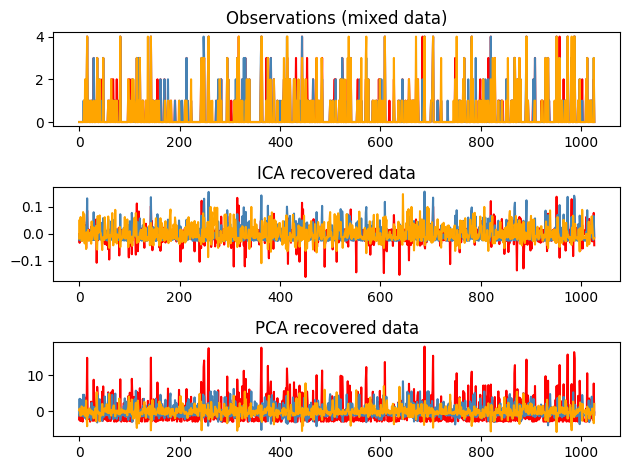

In [166]:
import matplotlib.pyplot as plt

plt.figure()

models = [np.array(X_train_enc), ica_result, H]
names = [
    "Observations (mixed data)",
    "ICA recovered data",
    "PCA recovered data",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()


In [130]:
fig=plt.figure()

plt.subplot(4,1,1)
plt.title("ICA")
plt.plot(ica_result.T)
fig.tight_layout()
plt.show()




In [131]:
contributions = ica.components_
contrib_df = pd.DataFrame(contributions)
contrib_df

0         1         2         3         4         5         6   \
0  0.004206  0.004100  0.004222  0.003629  0.004101  0.003467  0.003012   
1  0.001877  0.001792  0.001767  0.001687  0.001785  0.001636  0.001675   
2 -0.000108  0.000070 -0.000359 -0.000173 -0.000311 -0.000175 -0.000048   

         7         8         9   ...        28        29        30        31  \
0  0.002146  0.003774  0.001222  ... -0.004169 -0.005704 -0.006013 -0.002187   
1  0.001745  0.001789  0.001782  ...  0.000748  0.000889  0.000913  0.000540   
2 -0.000857 -0.000328 -0.000938  ... -0.001147 -0.001721 -0.001993 -0.000194   

         32        33        34        35        36        37  
0 -0.004757 -0.002530 -0.005636 -0.000701 -0.000429 -0.000767  
1  0.000905  0.000721  0.000868  0.001897  0.002126  0.002190  
2 -0.000922 -0.000705 -0.001400  0.008166  0.009443  0.010034  

[3 rows x 38 columns]

In [102]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(ica_result[:,0], ica_result[:,1])
plt.scatter(ica_result[:,1], ica_result[:,2])
plt.scatter(ica_result[:,2], ica_result[:,0])

# Reducción de dimensionalidad - MCA (Multiple Component Analysis)

Utilizamos MCA para representar los datos en un plano de baja dimensionalidad con base en una tabla de contingencia que captura las frecuencias que cada combinación de categorías tiene en nuestro conjunto de datos para posteriormente aplicar PCA para explicar la mayor varianza posible en el conjunto de datos y que se traduce en información útil para los modelos de clasificación.

In [682]:


import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)
mca_result = mca.fit(X_train_enc)

In [683]:
# obtain main components
main_comp_X_train = mca_result.eigenvalues_summary
main_comp_X_train

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.078        10.62%                     10.62%
1              0.031         4.15%                     14.77%
2              0.026         3.56%                     18.32%
3              0.021         2.91%                     21.23%
4              0.019         2.54%                     23.77%

In [684]:
mca.plot(
    X_train_enc,
    x_component=0,
    y_component=2,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [685]:
contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [686]:
contrib_df.to_csv('OHE_5comp_X_train_enc v6.csv')

In [687]:
mca_xtest = mca.transform(X_test_enc)
contributions_xtest = mca.column_contributions_.style.format('{:.0%}')
contrib_xtest = pd.DataFrame(contributions_xtest.data)

In [688]:
# Seleccionamos variables de X_train con 85% de variabilidad acumulada

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

X_train_enc = X_train_enc[selected_variables]

In [689]:
# Seleccionamos variables de X_train con 85% de variabilidad acumulada

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

X_test_enc = X_test_enc[selected_variables]

In [691]:
# Vemos la reducción en la dimensionalidad

print("Dimensiones de variables antes de MCA: ",df_adultos.shape)
print("Dimensiones de variables después de MCA: ",X_train_enc.shape)


Dimensiones de variables antes de MCA:  (1468, 689)
Dimensiones de variables después de MCA:  (1027, 62)


In [558]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])
num_pipeline_nombres = num_var

# Conjuntamos las transformaciones numéricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres)],
                                        remainder='passthrough')

## Métricas de desempeño

En el caso de problemas de clasificación y en especial donde existe sesgo en los conjuntos de datos (clases con mayor frecuancia que otras), no se sugiere utilizar Exactitud, la cual se centra en la clase mayoritaria, lo cual en nuestro caso implicaría que la clase minoritaria tendría más errores, que se traduciría en Falsos Negativos o diagnósticos negativos sobre alguna enfermedad. Para este tipo de problemas se recomienda utilizar la tasa de Verdaderos Positivos o Sensitividad, así como la exactitud sobre la clase positiva o Presición. También es útil combinar las dos, sobre todo para evaluar diferentes modelos con la misma métrica, como lo es F1-Score, conocido como la media harmónica de las dos métricas referidas:
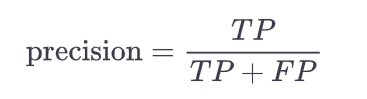

image.png

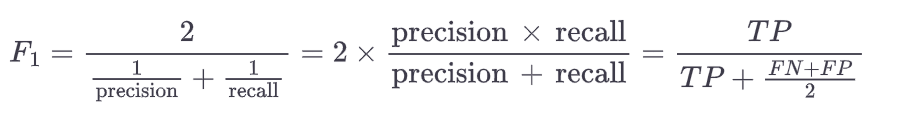



# Modelos de clasificación

Utilizamos modelos de clasificación binaria sobre cada una de las variables de salida de manera independiente, es decir, en este punto no estamos obteniendo resultados simultáneamente sobre todos los padecimientos en cada predicción a manera de obtener un baseline que nos permita un ajuste fino posterior. Para este fin al hacer OHE sobre las categoría de mayor frecuencia, nos permitió reflejar si el diagnóstico fue positivo o negativo, independientemente de la severidad del padecimiento.

In [826]:
# Iteramos sobre algunos modelos de clasificación para obtener resultados preliminares

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
   "Gradient Boosting": GradientBoostingClassifier()
}


models_lst = [LogisticRegression(max_iter=500),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),]
targets = ['Depresion_1.0', 'Ansiedad_1.0',
           'SOSPECHA DE ANOREXIA/BULIMIA_1.0',
           'TRANSTORNO_ESTRES POSTRAUMÁTICO_1.0']

target_names = ['positivo', 'negativo']
for name,model in models.items():
  for target in targets:
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train_enc, y_train_enc[target])
    y_hat=pipe.predict(X_test_enc)
    print(f'Resumen de métricos de {name} para {target}: \n\n' , classification_report(y_test_enc[target], y_hat, target_names=target_names))


Resumen de métricos de Logistic Regression para Depresion_1.0: 

               precision    recall  f1-score   support

    positivo       0.86      0.89      0.87       140
    negativo       0.95      0.93      0.94       301

    accuracy                           0.92       441
   macro avg       0.90      0.91      0.91       441
weighted avg       0.92      0.92      0.92       441

Resumen de métricos de Logistic Regression para Ansiedad_1.0: 

               precision    recall  f1-score   support

    positivo       0.90      0.91      0.91       135
    negativo       0.96      0.96      0.96       306

    accuracy                           0.94       441
   macro avg       0.93      0.93      0.93       441
weighted avg       0.94      0.94      0.94       441

Resumen de métricos de Logistic Regression para SOSPECHA DE ANOREXIA/BULIMIA_1.0: 

               precision    recall  f1-score   support

    positivo       0.50      0.25      0.34       110
    negativo       0.

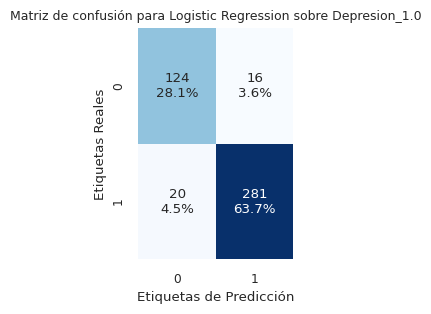

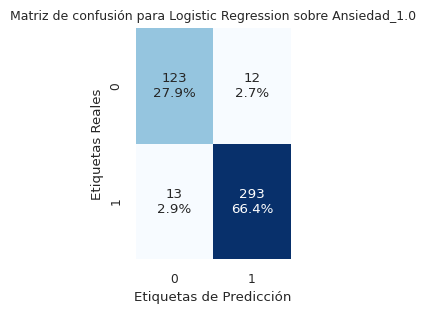

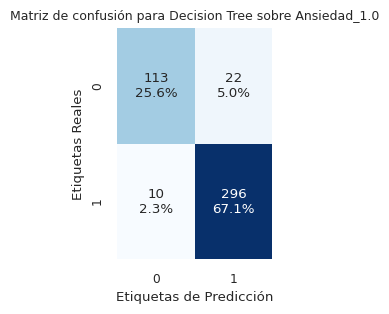

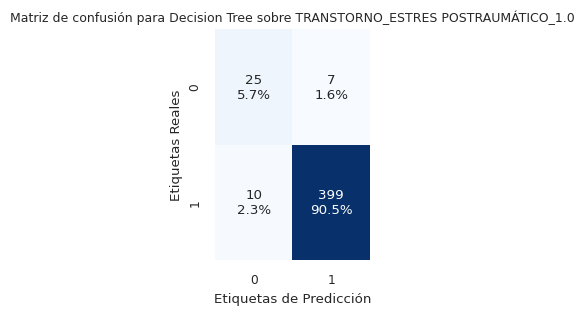

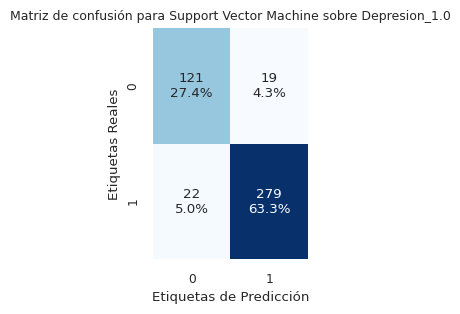

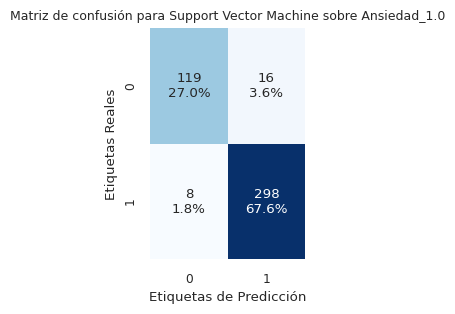

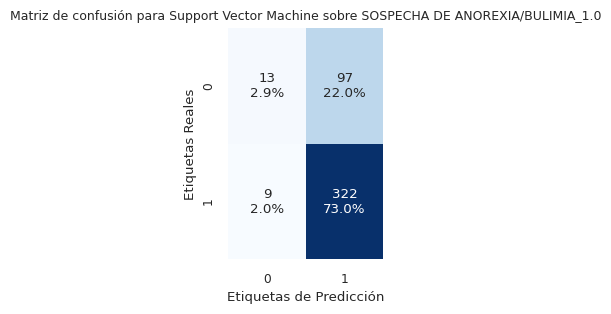

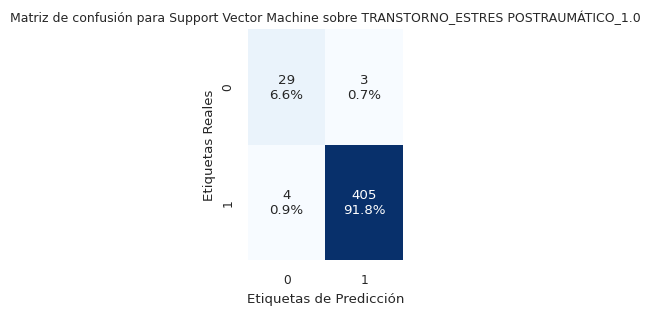

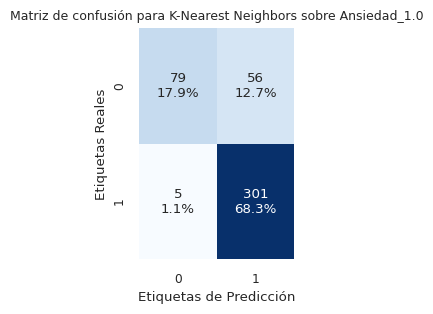

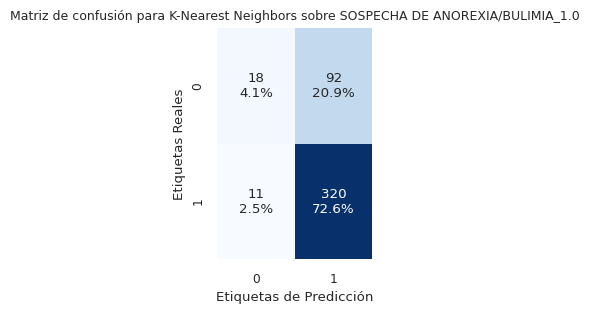

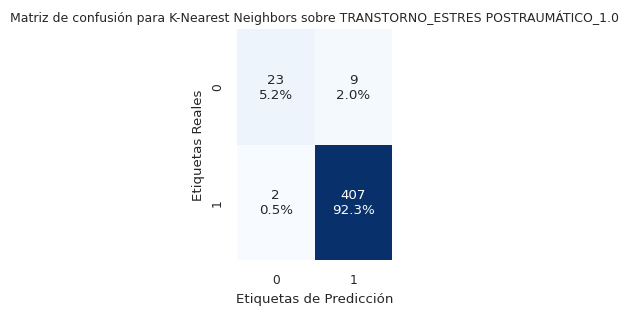

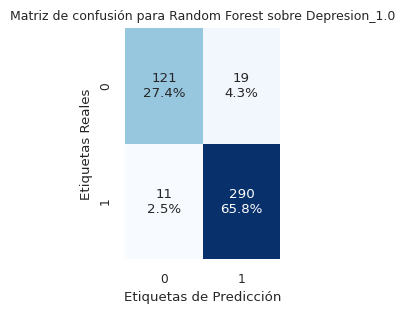

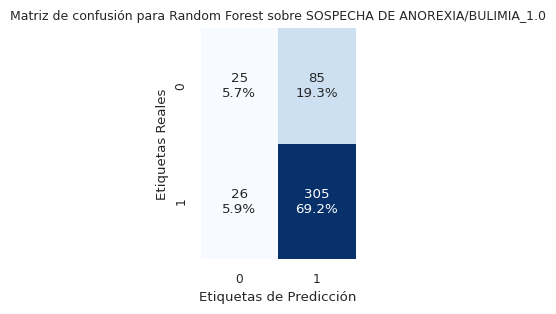

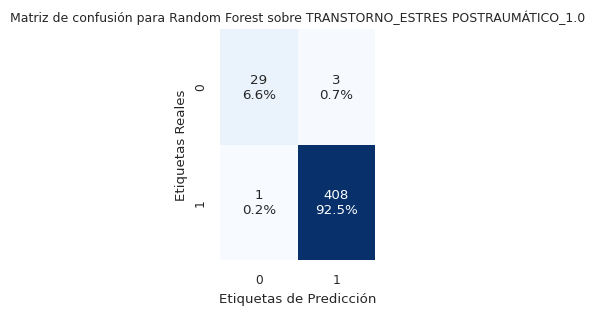

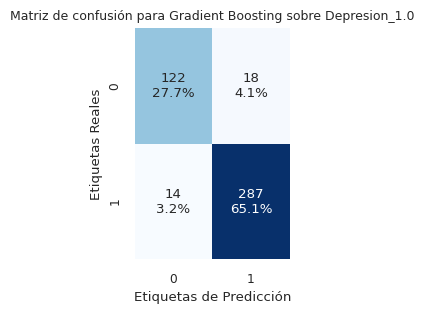

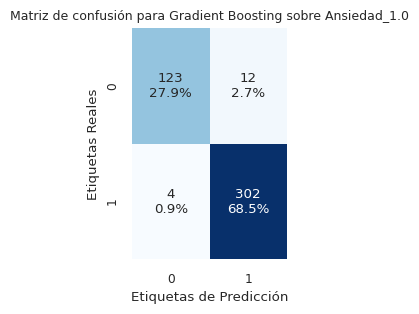

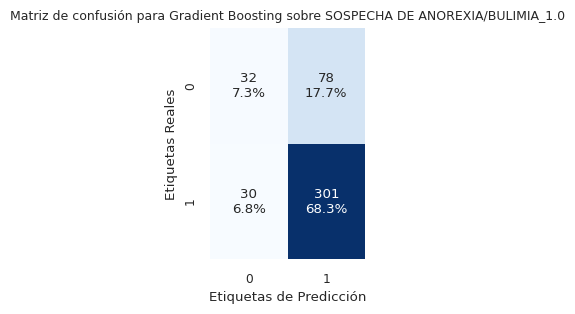

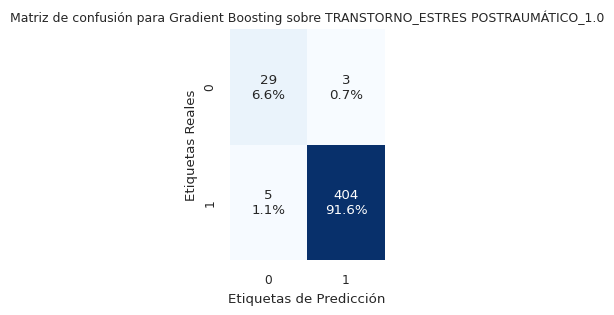

In [827]:
# Visualizamos las matrices de confusión para mayor detalle en el desempeño de
# los modelos sobre la clase positiva o minoritaria.

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
   "Gradient Boosting": GradientBoostingClassifier()
}


models_lst = [LogisticRegression(max_iter=500),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),]
targets = ['Depresion_1.0', 'Ansiedad_1.0',
           'SOSPECHA DE ANOREXIA/BULIMIA_1.0',
           'TRANSTORNO_ESTRES POSTRAUMÁTICO_1.0']

target_names = ['positivo', 'negativo']
for name,model in models.items():
  for target in targets:
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train_enc, y_train_enc[target])
    y_hat=pipe.predict(X_test_enc)

    cm = confusion_matrix(y_test_enc[target], y_hat)

    # Visualizamos los resultados del modelo en una matriz de confusión

    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(rc={'figure.figsize':(2,3)},font_scale=0.8)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.title(f'Matriz de confusión para {name} sobre {target}',fontsize=9)
    plt.show()



In [754]:
# Definimos una función para graficar matrices de confusión de manera automática

def mi_cm(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

Matriz de confusión en el conjunto de Validación de Depresion_1.0.
Modelo Dummy con la estrategia "stratified":


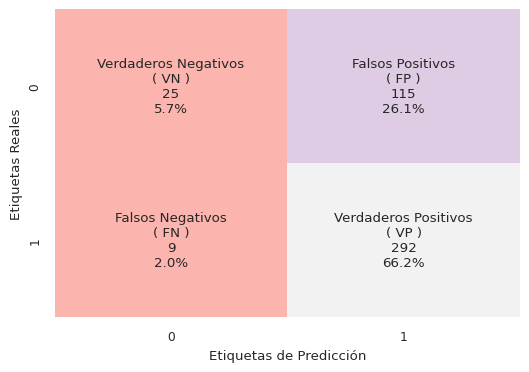

None
El valor mínimo de Exactitud dado por dummy classifier es:  63.72
El valor mínimo de Presición dado por dummy classifier es:  71.74 

Matriz de confusión en el conjunto de Validación de Ansiedad_1.0.
Modelo Dummy con la estrategia "stratified":


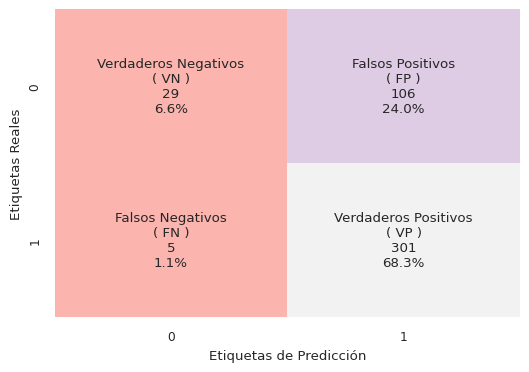

None
El valor mínimo de Exactitud dado por dummy classifier es:  66.67
El valor mínimo de Presición dado por dummy classifier es:  73.96 

Matriz de confusión en el conjunto de Validación de SOSPECHA DE ANOREXIA/BULIMIA_1.0.
Modelo Dummy con la estrategia "stratified":


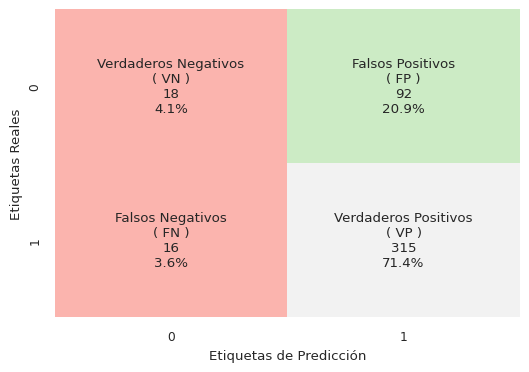

None
El valor mínimo de Exactitud dado por dummy classifier es:  70.52
El valor mínimo de Presición dado por dummy classifier es:  77.40 

Matriz de confusión en el conjunto de Validación de TRANSTORNO_ESTRES POSTRAUMÁTICO_1.0.
Modelo Dummy con la estrategia "stratified":


None
El valor mínimo de Exactitud dado por dummy classifier es:  82.77
El valor mínimo de Presición dado por dummy classifier es:  99.26 



In [813]:
# El modelo Dummy es un clasificador que se utiliza como baseline, ya que hace
# predicciones sin tomar en cuenta los datos de entrada, pero nos sirve como
# referencia para determinar el mínimo desempeño aceptable.

modeloDummy = DummyClassifier(strategy='stratified', random_state=7)   # Hacemos predicciones aleatorias de la misma
targets = ['Depresion_1.0', 'Ansiedad_1.0',                            # manera en que están estratificadas las clases.
           'SOSPECHA DE ANOREXIA/BULIMIA_1.0',
           'TRANSTORNO_ESTRES POSTRAUMÁTICO_1.0']

for target in targets:
  modeloDummy.fit(X_train_enc, y_train_enc[target], sample_weight=None)
  yhat = modeloDummy.predict(X_test_enc)

  print(f'Matriz de confusión en el conjunto de Validación de {target}.')
  print('Modelo Dummy con la estrategia "stratified":')
  print(mi_cm(y_test_enc[target], y_hat))

  accuracy = modeloDummy.score(y_test_enc[target], y_hat)
  precision = precision_score(y_test_enc[target], y_hat)

  print("El valor mínimo de Exactitud dado por dummy classifier es: ", '%0.2f'% (accuracy * 100))
  print("El valor mínimo de Presición dado por dummy classifier es: ", '%0.2f'% (precision * 100) ,'\n')

**Feature Importance**

Evaluamos la importancia de las características por medio del atributo  feature_importances_ del modelo Random Forest de scikit-learn, podemos ver en el ejemplo del target "Ansiedad_1.0" que las variables que tienen mayor relevancia tienen relación lógica con la variable de salida, ya que se trata de las siguientes preguntas realizadas a los encuestados:

AD_M09_100_04.- DURANTE EL PASADO MES, ¿CUÁNTA MOLESTIA HA SENTIDO POR
SENTIRSE MUY ANGUSTIADO CUANDO ALGO LE HIZO RECORDAR LA
EXPERIENCIA ESTRESANTE?

AD_M09_100_11.- DURANTE EL PASADO MES, ¿CUÁNTA MOLESTIA HA SENTIDO POR TENER SENTIMIENTOS NEGATIVOS INTENSOS, COMO MIEDO, TERROR, IRA, CULPA O VERGÜENZA?

AD_M09_100_03.- DURANTE EL PASADO MES, ¿CUÁNTA MOLESTIA HA SENTIDO POR SENTIR O ACTUAR REPENTINAMENTE COMO SI LA EXPERIENCIA ESTRESANTE ESTUVIERA SUCEDIENDO NUEVAMENTE (COMO SI ESTUVIERA REVIVIÉNDOLA)?

In [824]:
# Pipeline de modelado para niños de 4 años en adelante
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=0))
])

pipeline.fit(X_train_enc, y_train_enc['Ansiedad_1.0'])
# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test_enc)

# Evaluación detallada de los modelos utilizando reportes de clasificación
report_ = classification_report(y_test_enc['Ansiedad_1.0'], y_pred, output_dict=True)

# Importancia de las características para el grupo de niños menores de 4 años
feature_importances = pipeline.named_steps['classifier'].feature_importances_


# Seleccionamos las 10 características más importantes para cada grupo como ejemplo
top_features_ = feature_importances.argsort()[-10:][::-1]

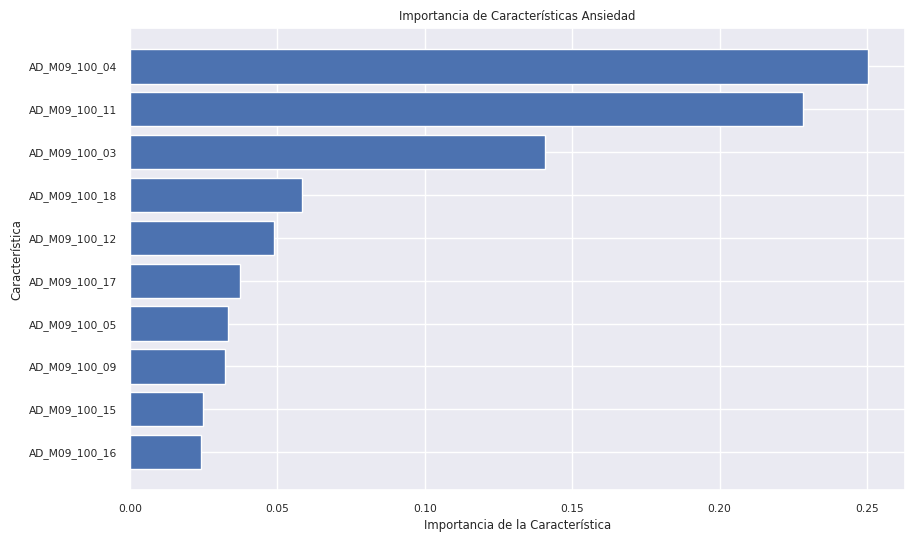

In [712]:

# Nombres de las características después de la codificación One-Hot y otros preprocesamientos
feature_names = np.array(X_train_enc.columns.tolist())

# Función para visualizar la importancia de las características
def plot_feature_importances(importances, feature_names, title):
    # Ordenar las importancias y sus índices
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = feature_names[indices]

    # Seleccionar las 10 características más importantes
    top_indices = indices[:10]
    top_importances = importances[top_indices]
    top_feature_names = sorted_feature_names[:10]

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(len(top_indices)), top_importances, align='center')
    plt.yticks(range(len(top_indices)), top_feature_names)
    plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
    plt.xlabel('Importancia de la Característica')
    plt.ylabel('Característica')
    plt.show()

# Visualizar la importancia de las características para menores de 4 años
plot_feature_importances(feature_importances, feature_names, "Importancia de Características Ansiedad")

# Curvas de aprendizaje

Evaluamos el efecto de agregar más muestras a los ciclos de entrenamiento de los modelos en cada época, así como su capacidad de generalizar en los subconjuntos de prueba para determinar si existe una condición de sub-ajuste o sobre-ajuste.

In [696]:
# Creamos una función par automatizar la generación de las curvas de aprendizaje

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, model_name, target):

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(4,3))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title(f'Curvas de Aprendizaje de {model_name} sobre {target} incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [697]:
def mi_ModeloYCurvas(Xin, modelo, target, model_name):

       mi_pipe = Pipeline([('escalar', StandardScaler()),('modelo', modelo)])

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)


       delta_train_sz = np.linspace(0.1,1,40)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe,
                                                        X = Xin,
                                                        y = y_train_enc[target],
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)

       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, model_name, target)


Curvas de aprendizaje del modelo lineal:


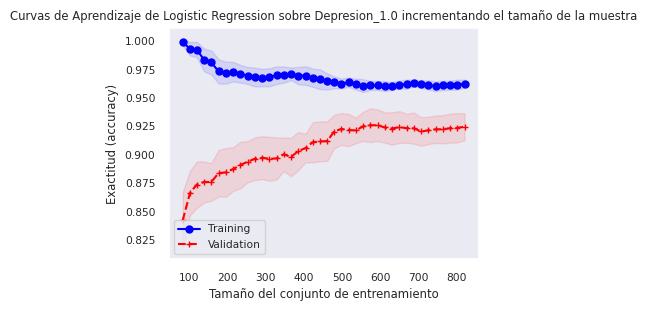

Curvas de aprendizaje del modelo lineal:


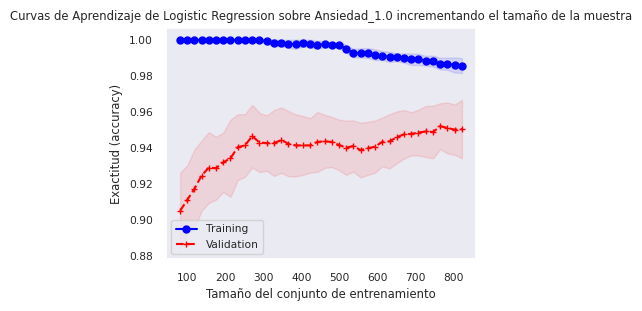

Curvas de aprendizaje del modelo lineal:


Curvas de aprendizaje del modelo lineal:


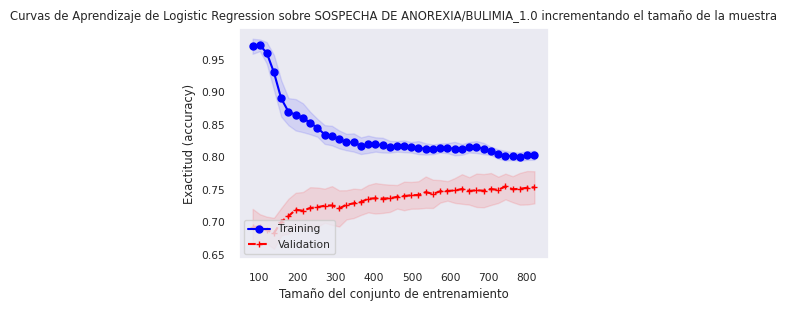

Curvas de aprendizaje del modelo lineal:


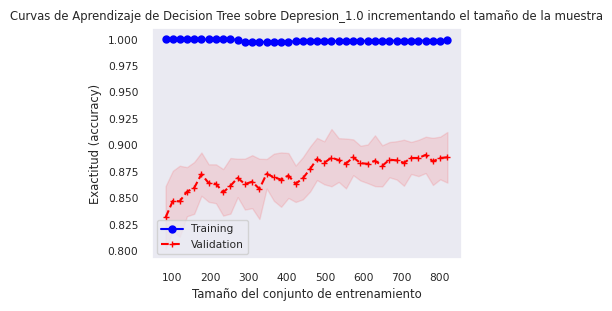

Curvas de aprendizaje del modelo lineal:


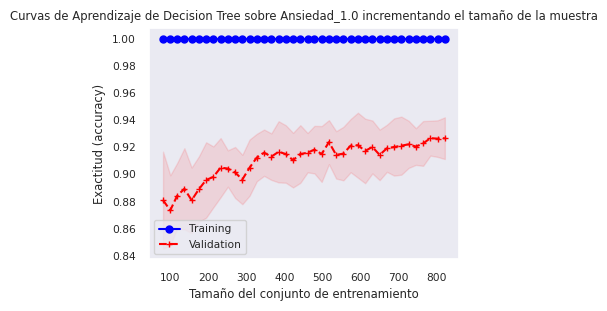

Curvas de aprendizaje del modelo lineal:


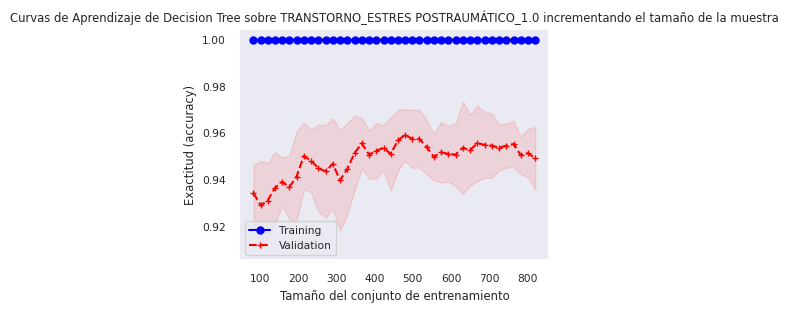

Curvas de aprendizaje del modelo lineal:


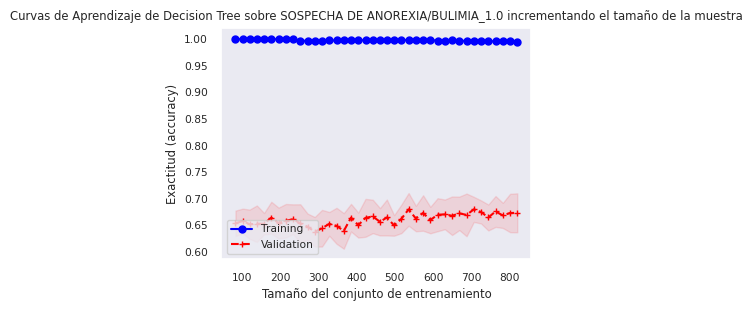

Curvas de aprendizaje del modelo lineal:


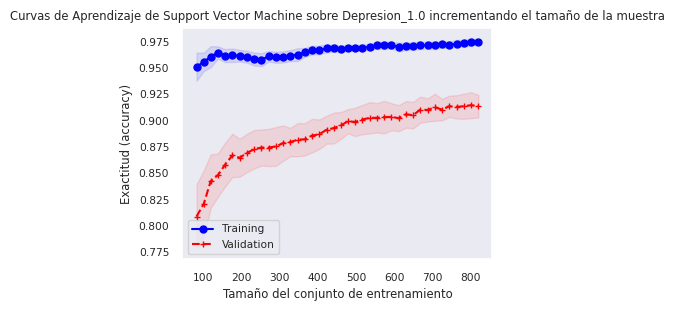

Curvas de aprendizaje del modelo lineal:


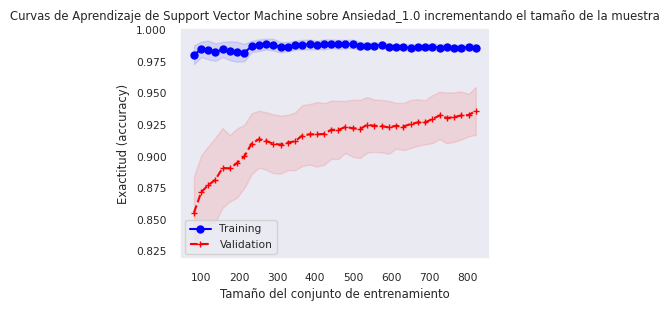

Curvas de aprendizaje del modelo lineal:


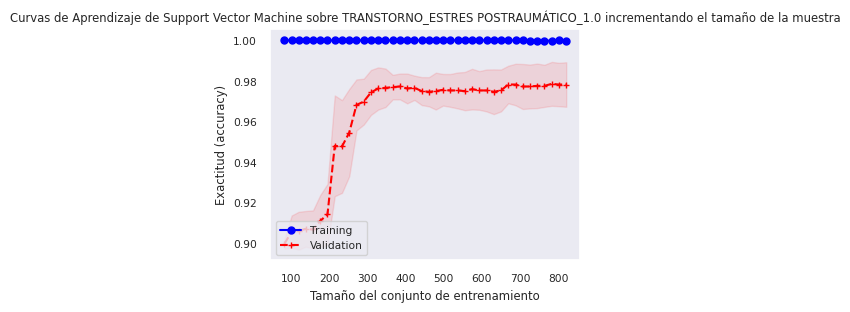

Curvas de aprendizaje del modelo lineal:


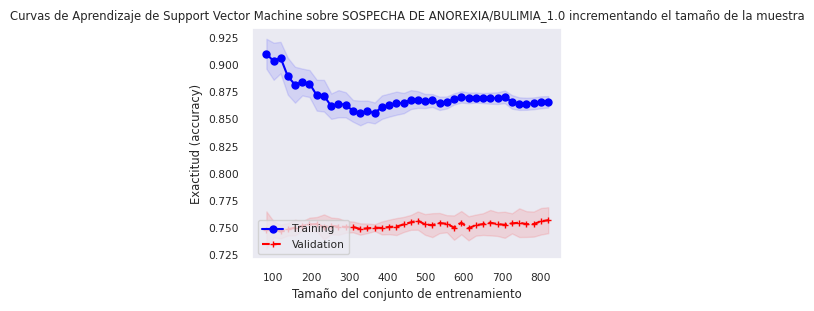

Curvas de aprendizaje del modelo lineal:


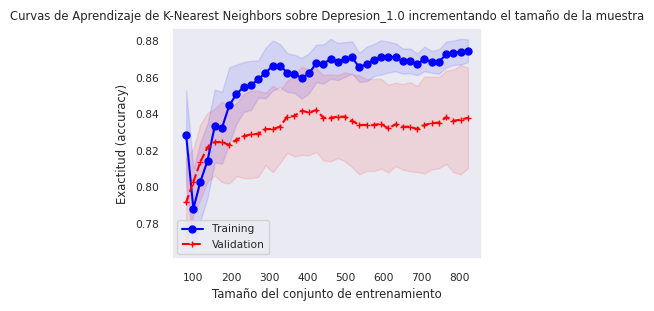

Curvas de aprendizaje del modelo lineal:


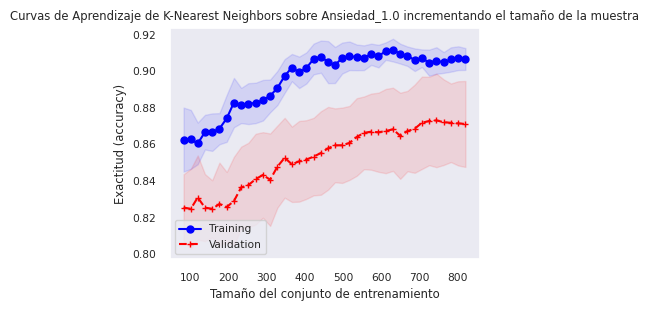

Curvas de aprendizaje del modelo lineal:


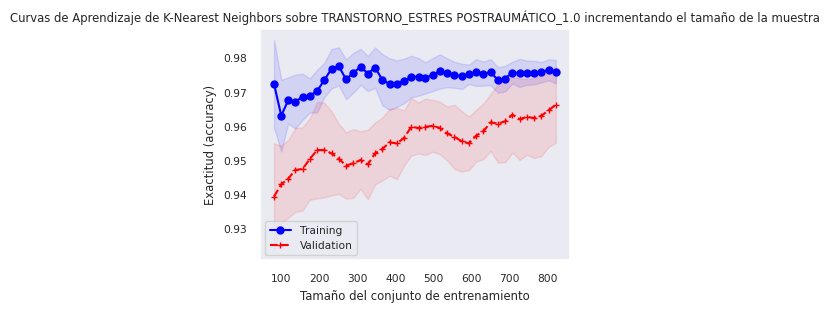

Curvas de aprendizaje del modelo lineal:


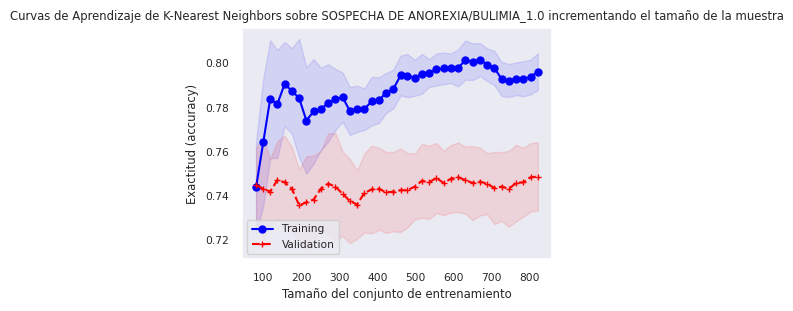

Curvas de aprendizaje del modelo lineal:


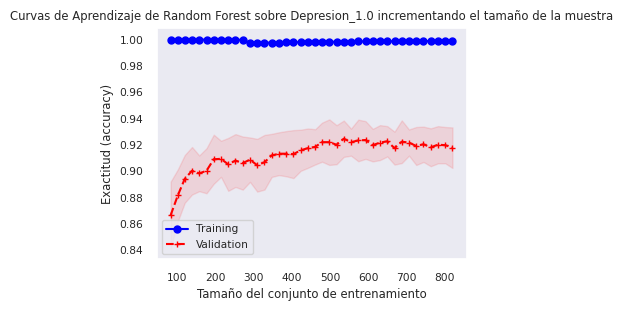

Curvas de aprendizaje del modelo lineal:


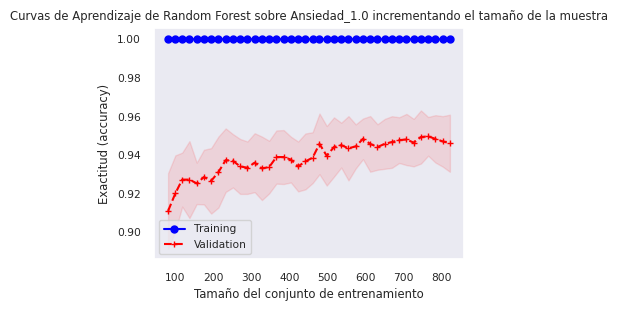

Curvas de aprendizaje del modelo lineal:


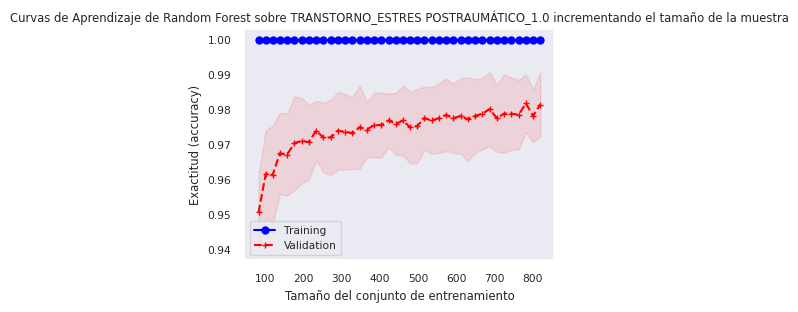

Curvas de aprendizaje del modelo lineal:


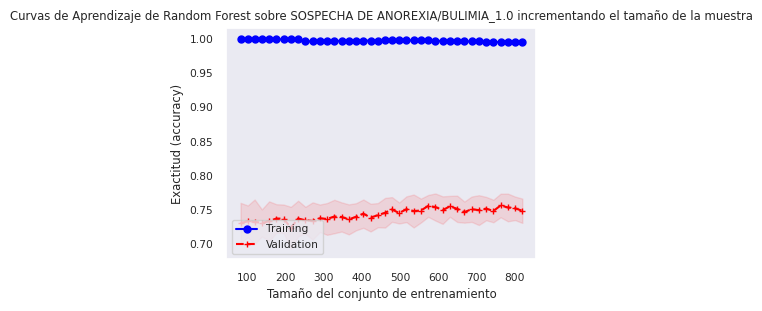

Curvas de aprendizaje del modelo lineal:


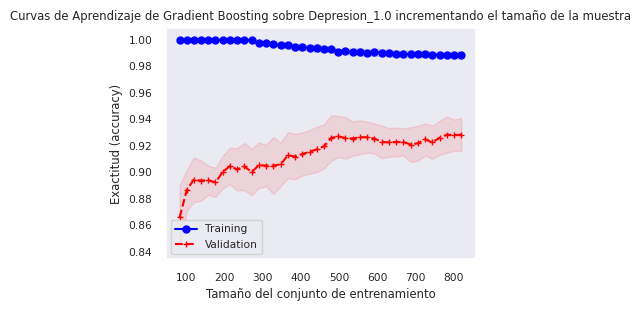

Curvas de aprendizaje del modelo lineal:


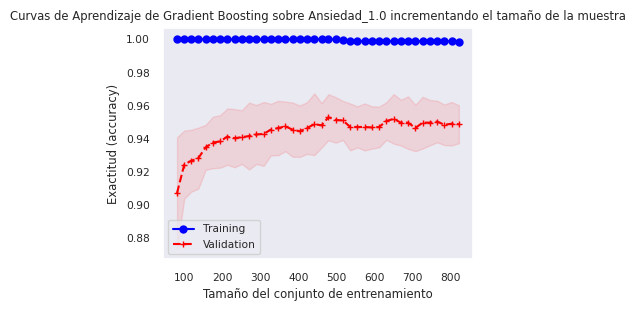

Curvas de aprendizaje del modelo lineal:


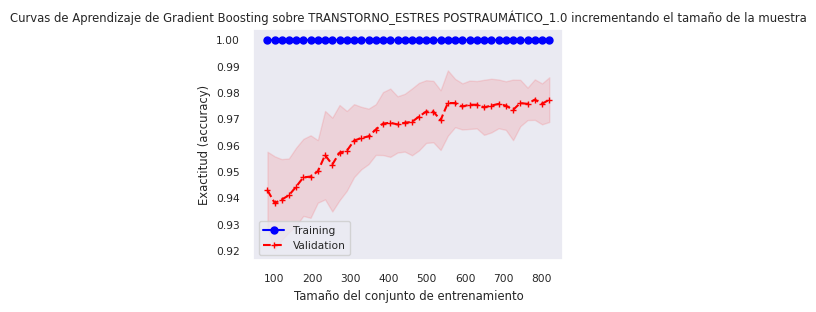

Curvas de aprendizaje del modelo lineal:


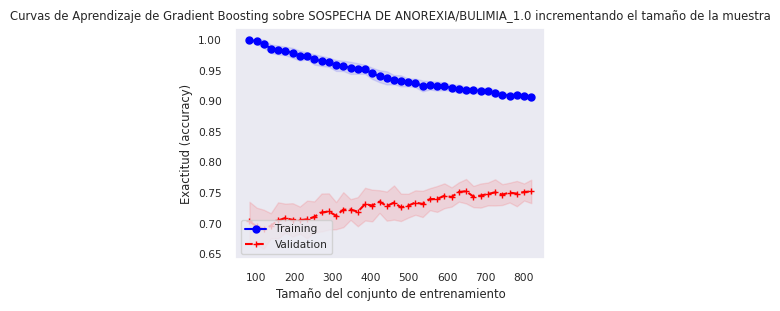

In [698]:
# Verificamos las curvas de entrenamiento que se obtienen con 62 variables de entrada:

for name,model in models.items():
  for target in y_train_enc.columns:
    print('Curvas de aprendizaje del modelo lineal:')
    mi_ModeloYCurvas(X_train_enc, model, target, name)

**Sub-Ajuste Vs Sobre-Ajuste**

Se observa que el modelo de Regresión Logística es el que más aprendizaje muestra, ya que la diferencia entre las curvas de entrenamiento y validación es de menos del 10%. Sin embargo, para el padecimiento de Trastornos Alimenticios, el resultado es muy similar al Dummy Classifier, por lo que está realizando predicciones sin ninguna mejora en comparación a resultados al azar, por lo que tendremos que hacer un ajuste fino en los parámetros que nos permitan tener un mejor resultado. El resto de los modelos tiene resultados aceptables, pero muestran un sobre-entrenamiento significativo para el padecimiento mencionado, por lo que no serán confiables para realizar predicciones certeras con datos nuevos.

# **Modelo Niños**

In [ ]:
import pandas as pd

# Cargamos el archivo Excel
file_path = '/content/2.2.Base de ACES_Menores.xlsx'
df = pd.read_excel(file_path)

# Verificamos las primeras filas del dataframe para entender su estructura
df.head()

FOLIO               FOLIO2 VERSION  FILTRO  ENT  \
0  0100108639999001-01  0100108639999001-01   VER02       2    1   
1  0100108639999001-03  0100108639999001-03   VER02       2    1   
2  0100108639999001-04  0100108639999001-04   VER02       2    1   
3  0100108639999001-05  0100108639999001-05   VER02       2    1   
4  0100108639999002-02  0100108639999002-02   VER02       2    1   

          ENTIDAD  MUN       MUNICIPIO  LOC           LOCALIDAD  ... GPOEDAD  \
0  AGUASCALIENTES    1  AGUASCALIENTES  863  COTORINA (COYOTES)  ...     1.0   
1  AGUASCALIENTES    1  AGUASCALIENTES  863  COTORINA (COYOTES)  ...     NaN   
2  AGUASCALIENTES    1  AGUASCALIENTES  863  COTORINA (COYOTES)  ...     NaN   
3  AGUASCALIENTES    1  AGUASCALIENTES  863  COTORINA (COYOTES)  ...     2.0   
4  AGUASCALIENTES    1  AGUASCALIENTES  863  COTORINA (COYOTES)  ...     2.0   

   ESCOLARIDAD  HERMANOS  ACT_FAM  NLIBROS  NOVIOLENCIA  VIOLENCIA_FIS  \
0          2.0       1.0        2        0          0.0            0.0   
1          1.0       1.0        1        0          0.0            0.0   
2          1.0       1.0        2        0          1.0            0.0   
3          1.0       1.0        2        0          0.0            0.0   
4          1.0       1.0        1        0          0.0            1.0   

   VIOLENCIA_PSIC  VIOLENCIA  VIOLENCIA_SEVERA  
0             0.0        1.0               0.0  
1             1.0        1.0               0.0  
2             0.0        0.0               0.0  
3             0.0        1.0               0.0  
4             0.0        1.0               0.0  

[5 rows x 398 columns]

In [ ]:
# Columns a eliminar irrelevantes para la evaluacion
columns_to_remove = [
    "NN_M06_09", "NN_M06_10_1", "NN_M06_10_2", "NN_M06_10_3", "NN_M06_10_4",
    "NN_M06_10_5", "NN_M06_10_6", "NN_M06_10_7", "NN_M06_10_8", "NN_M05_18",
    "NN_M05_19", "NN_M06_02", "NN_M06_03", "NN_M06_04", "NN_M06_07",
    "NN_M06_10_9", "NN_M06_10_10", "NN_M06_10_11", "NN_M06_10_12",
    "NN_M06_10_13", "NN_M06_10_14", "NN_M06_10_15", "NN_M06_10_16",
    "NN_M07_05", "NN_M07_06", "NN_M07_18B", "NN_M07_19A2", "NN_M07_19B2",
    "NN_M07_19C2", "NN_M07_19D2", "NN_M07_19E2", "NN_M07_19F2", "NN_M07_19G2",
    "NN_M07_22", "NN_MO7_25V", "NN_M07_26", "NN_M14_02", "NN_M14_04",
    "NN_M14_06", "NN_M14_08", "NN_M03_02", "NN_M03_03", "NN_M03_04",
    "NN_M03_05", "NN_M03_06", "FOLIO2","FOLIO","MESES_CALC","DIAS_CALC", "VERSION", "FILTRO", "ENT", "ENTIDAD",
    "MUN", "MUNICIPIO", "LOC", "LOCALIDAD", "AGEB", "MZN", "ENC", "MAQUINA",
    "GPS1", "LATITUD", "LONGITUD","PEARLS_Pte1","NM_M04_01","NN_M04_04","NN_M04_06","NN_M04_07", "GPOEDAD","NN_M04_05","NN_M05_02", "NM_M04_03",
    "NN_M05_10", "NN_M07_01", "NN_M07_02", "NN_M07_03", "NN_M07_17", "NN_M07_18",
    "NN_M12_01", "NN_M12_261", "NN_M13_09", "EDADM", "HERMANOS","PONDERADOR"
]

# Remover columnas
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')

df_cleaned.head()

EDAD_CALC  NN_M04_08  NN_M04_09 NN_M04_10  NN_M04_11  NN_M04_12  NN_M04_13  \
0          3        NaN          4       NaN          1        2.0          2   
1          5        NaN          3       NaN          1        1.0          2   
2          5        NaN          3       NaN          1        1.0          2   
3          4        NaN          2       NaN          1        3.0          3   
4          4        NaN          2       NaN          1        1.0          1   

   NOTA5  NN_M05_01  NN_M05_03  ...  RURAL AREA  ESCOLARIDAD  ACT_FAM  \
0      1         23          1  ...      1    1          2.0        2   
1      1         25          1  ...      1    1          1.0        1   
2      1         21          1  ...      1    1          1.0        2   
3      1         28          1  ...      1    1          1.0        2   
4      1         14          1  ...      1    1          1.0        1   

   NLIBROS  NOVIOLENCIA  VIOLENCIA_FIS  VIOLENCIA_PSIC  VIOLENCIA  \
0        0          0.0            0.0             0.0        1.0   
1        0          0.0            0.0             1.0        1.0   
2        0          1.0            0.0             0.0        0.0   
3        0          0.0            0.0             0.0        1.0   
4        0          0.0            1.0             0.0        1.0   

   VIOLENCIA_SEVERA  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 313 columns]

In [ ]:
# Buscamos y eliminamos columnas que coincidan con el patrón "NOTA(numero)"
import re

# Patrón para identificar las columnas con el formato "NOTA(numero)"
pattern = re.compile(r'NOTA\d+')

# Filtramos las columnas que coinciden con el patrón
columns_to_remove = [col for col in df_cleaned.columns if pattern.match(col)]

# Eliminamos las columnas identificadas del dataframe
df_cleaned_filtered = df_cleaned.drop(columns=columns_to_remove, errors='ignore')

# Mostramos las columnas eliminadas y la nueva dimensión del dataframe
columns_to_remove, df_cleaned_filtered.shape

(['NOTA5',
  'NOTA6',
  'NOTA7',
  'NOTA8',
  'NOTA9',
  'NOTA10',
  'NOTA11A',
  'NOTA11B',
  'NOTA11C',
  'NOTA11D',
  'NOTA12',
  'NOTA121',
  'NOTA13',
  'NOTA14'],
 (249, 299))

In [ ]:
# Removemos filas duplicadas
df_no_duplicates = df_cleaned_filtered.drop_duplicates()

# Calculamos el porcentaje de datos faltantes por columna
missing_data_percent = df_no_duplicates.isnull().mean() * 100

# Filtramos las columnas para remover aquellas con más del 50% de datos faltantes
columns_to_keep = missing_data_percent[missing_data_percent <= 50].index

# Mantenemos solo las columnas seleccionadas
df_filtered_final = df_no_duplicates[columns_to_keep]

# Resultados
df_no_duplicates_shape = df_no_duplicates.shape
df_filtered_final_shape = df_filtered_final.shape
df_no_duplicates_shape, df_filtered_final_shape

((249, 299), (249, 219))

In [ ]:
# Reemplazar los valores 999 por 0 en todo el DataFrame
df_filtered_final = df_filtered_final.replace(999,0)

# Verificar el reemplazo mostrando nuevamente las primeras filas
df_filtered_final.head()

EDAD_CALC  NN_M04_09  NN_M04_11  NN_M04_12  NN_M04_13  NN_M05_01  \
0          3          4          1        2.0          2         23   
1          5          3          1        1.0          2         25   
2          5          3          1        1.0          2         21   
3          4          2          1        3.0          3         28   
4          4          2          1        1.0          1         14   

   NN_M05_03  NN_M05_04  NN_M05_06  NN_M05_08  ...  RURAL  AREA  ESCOLARIDAD  \
0          1          1          2          2  ...      1     1          2.0   
1          1          2          1          2  ...      1     1          1.0   
2          1          2          1          2  ...      1     1          1.0   
3          1          2          1          2  ...      1     1          1.0   
4          1          2          1          2  ...      1     1          1.0   

   ACT_FAM  NLIBROS  NOVIOLENCIA  VIOLENCIA_FIS  VIOLENCIA_PSIC  VIOLENCIA  \
0        2        0          0.0            0.0             0.0        1.0   
1        1        0          0.0            0.0             1.0        1.0   
2        2        0          1.0            0.0             0.0        0.0   
3        2        0          0.0            0.0             0.0        1.0   
4        1        0          0.0            1.0             0.0        1.0   

   VIOLENCIA_SEVERA  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 219 columns]

In [ ]:
# Contar cuántas veces se usó el valor 8 en todas las columnas del DataFrame
count_8_per_column = df_filtered_final.apply(lambda x: (x == 123).sum())

# Filtrar solo las columnas donde el conteo es mayor que 0 para simplificar la visualización
columns_with_8 = count_8_per_column[count_8_per_column > 0]

columns_with_8

NN_M10_04A     9
NN_M10_04B     9
NN_M10_04C    11
NN_M10_04D    11
NN_M10_04E    22
NN_M10_04F    16
NN_M10_04G    16
dtype: int64

In [ ]:
for col in df_filtered_final.columns:
    mode_value = df_filtered_final[col].mode()[0]  # Tomamos la primera moda si hay múltiples
    df_filtered_final[col].fillna(mode_value, inplace=True)

In [ ]:
# Cargamos el diccionario de la encuesta para identificar las columnas de clasificación
diccionario_path = '/content/Diccionario Encuestas Niños.xlsx'
diccionario_df = pd.read_excel(diccionario_path)

# Verificamos las primeras filas del diccionario para entender su estructura
diccionario_df.head()

ID Columna  Categoria                              Descripcion Valores  \
0   NM_M04_03  Individuo                   FECHA DE NACIMIENTO DE     NaN   
1   NM_M04_04  Individuo  ¿FUE VERIFICADA LA FECHA DE NACIMIENTO?    1=SÍ   
2   EDAD_CALC  Individuo                                EDAD_CALC     NaN   
3  MESES_CALC  Individuo                               MESES_CALC     NaN   
4   DIAS_CALC  Individuo                                DIAS_CALC     NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1       2=NO        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN

In [ ]:
# Filtramos las columnas que tienen valores definidos, indicando posiblemente una clasificación
columnas_con_valores_definidos = diccionario_df[diccionario_df['Valores'].notnull()]['ID Columna']

# Convertimos la serie en lista para facilitar la visualización
columnas_con_valores_definidos_list = columnas_con_valores_definidos.tolist()

columnas_con_valores_definidos_list

['NM_M04_04',
 'NN_M04_05',
 'NN_M04_09',
 'NN_M04_11',
 'NOTA5',
 'NN_M05_03',
 'NN_M05_04',
 'NN_M05_06',
 'NN_M05_08',
 'NN_M05_09',
 'NN_M05_10',
 'NN_M05_11',
 'NN_M05_12',
 'NN_M05_13',
 'NN_M05_14',
 'NN_M05_15',
 'NN_M05_17',
 'NN_M06_01',
 'NN_M06_05',
 'NN_M06_07',
 'NN_M06_09',
 'NN_M06_10_1',
 'NN_M06_10_2',
 'NN_M06_10_3',
 'NN_M06_10_4',
 'NN_M06_10_5',
 'NN_M06_10_6',
 'NN_M06_10_7',
 'NN_M06_10_8',
 'NN_M05_17',
 'NN_M06_01',
 'NN_M06_05',
 'NN_M06_07',
 'NN_M06_10_9',
 'NN_M06_10_10',
 'NN_M06_10_11',
 'NN_M06_10_12',
 'NN_M06_10_13',
 'NN_M06_10_14',
 'NN_M06_10_15',
 'NN_M06_10_16',
 'N_M07_01',
 'NN_M07_02',
 'NN_M07_03',
 'NN_M07_04',
 'NN_M07_07',
 'NN_M07_08',
 'NN_M07_11',
 'NN_M07_12',
 'NN_M07_13',
 'NN_M07_14',
 'NN_M07_15',
 'NN_M07_16',
 'NN_M07_17',
 'NN_M07_18',
 'NN_M07_18B',
 'NN_M07_19A1',
 'NN_M07_19A2',
 'NN_M07_19B1',
 'NN_M07_19B2',
 'NN_M07_19C1',
 'NN_M07_19C2',
 'NN_M07_19D1',
 'NN_M07_19D2',
 'NN_M07_19E1',
 'NN_M07_19E2',
 'NN_M07_19F1',
 'NN_

In [ ]:
# Convertimos las columnas identificadas como categóricas en el dataframe a tipo 'category'
for col in columnas_con_valores_definidos_list:
    if col in df_filtered_final.columns:
        df_filtered_final[col] = df_filtered_final[col].astype('category')

# Verificamos los nuevos tipos de datos para confirmar la conversión
df_filtered_final.dtypes

EDAD_CALC              int64
NN_M04_09           category
NN_M04_11           category
NN_M04_12            float64
NN_M04_13              int64
                      ...   
NOVIOLENCIA         category
VIOLENCIA_FIS        float64
VIOLENCIA_PSIC       float64
VIOLENCIA            float64
VIOLENCIA_SEVERA     float64
Length: 219, dtype: object

In [ ]:
columnas_numericas = df_filtered_final.select_dtypes(include=['number']).columns.tolist()

columnas_numericas

['EDAD_CALC',
 'NN_M04_12',
 'NN_M04_13',
 'NN_M05_01',
 'NN_M06_06',
 'NN_M07_09',
 'NN_M07_10',
 'NN_M10_01A',
 'NN_M10_03',
 'PEARLS1',
 'Escala1',
 'Escala2',
 'Escala3',
 'Escala4',
 'Escala5',
 'Escala_Inter',
 'Escala_Exter',
 'Escala_Total',
 'SDQ3',
 'DxSDQ3',
 'SDQ4',
 'DxSDQ4',
 'PEARLS_Pte2',
 'ABUSO_SEXUAL',
 'NSEF',
 'NSE5F',
 'RURAL',
 'NLIBROS',
 'VIOLENCIA_FIS',
 'VIOLENCIA_PSIC',
 'VIOLENCIA',
 'VIOLENCIA_SEVERA']

In [ ]:
columnas_a_convertir = [
    "PEARLS1", "Escala1", "Escala2", "Escala3", "Escala4", "Escala5",
    "Escala_Inter", "Escala_Exter", "Escala_Total", "SDQ3", "DxSDQ3", "SDQ4",
    "DxSDQ4", "PEARLS_Pte2", "ABUSO_SEXUAL", "NSEF", "NSE5F", "RURAL",
    "VIOLENCIA_FIS", "VIOLENCIA_PSIC", "VIOLENCIA", "VIOLENCIA_SEVERA"
]

# Convertimos las columnas especificadas a tipo 'category'
for col in columnas_a_convertir:
    if col in df_filtered_final.columns:
        df_filtered_final[col] = df_filtered_final[col].astype('category')

# Verificamos los tipos de las columnas convertidas para confirmar la conversión
df_filtered_final[columnas_a_convertir].dtypes

PEARLS1             category
Escala1             category
Escala2             category
Escala3             category
Escala4             category
Escala5             category
Escala_Inter        category
Escala_Exter        category
Escala_Total        category
SDQ3                category
DxSDQ3              category
SDQ4                category
DxSDQ4              category
PEARLS_Pte2         category
ABUSO_SEXUAL        category
NSEF                category
NSE5F               category
RURAL               category
VIOLENCIA_FIS       category
VIOLENCIA_PSIC      category
VIOLENCIA           category
VIOLENCIA_SEVERA    category
dtype: object

In [ ]:
# Primero, creamos un diccionario de mapeo de ID de columna a Descripción omitiendo la columna PEARLS1
mapeo_titulos = diccionario_df.set_index('ID Columna')['Descripcion'].to_dict()

# Modificamos el nombre de 'PEARLS1' a 'PEARLS' en el diccionario de mapeo si está presente
if 'PEARLS1' in mapeo_titulos:
    mapeo_titulos['PEARLS'] = mapeo_titulos.pop('PEARLS1')

# Renombramos las columnas del dataframe usando el diccionario de mapeo
# Solo se renombrarán las columnas presentes tanto en el dataframe como en el diccionario de mapeo
columnas_renombradas_df = df_filtered_final.rename(columns=lambda x: mapeo_titulos[x] if x in mapeo_titulos else x)

# Mostramos algunas de las nuevas columnas para confirmar el cambio
columnas_renombradas_df.columns.tolist()[:10]  # Mostramos solo las primeras 10 para verificar

['EDAD_CALC',
 'NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO',
 '¿TIENE HERMANOS?',
 '¿CUÁNTOS HERMANOS TIENE NOMBRE?',
 'DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?',
 'EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE',
 'LA MADRE LLEVÓ CONTROL PRENATAL',
 'HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO',
 'DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL  TABACO O ALGUNA SUSTANCIA',
 'DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA  PSICOLÓGICA  ECONÓMICA O SEXUAL?']

In [ ]:
estadisticas_descriptivas = columnas_renombradas_df.select_dtypes(include=['number']).describe()

estadisticas_descriptivas

EDAD_CALC  ¿CUÁNTOS HERMANOS TIENE NOMBRE?  \
count  249.000000                       249.000000   
mean     3.991968                         1.658635   
std      0.941824                         1.047239   
min      0.000000                         0.000000   
25%      3.000000                         1.000000   
50%      4.000000                         1.000000   
75%      5.000000                         2.000000   
max      7.000000                         6.000000   

       DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?  \
count                             249.000000   
mean                                2.068273   
std                                 1.121346   
min                                 1.000000   
25%                                 1.000000   
50%                                 2.000000   
75%                                 3.000000   
max                                 8.000000   

       EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE  \
count                                     249.000000   
mean                                       25.791165   
std                                         8.062543   
min                                         5.000000   
25%                                        21.000000   
50%                                        25.000000   
75%                                        30.000000   
max                                        99.000000   

       ¿CUÁNTAS COMIDAS NOMBRE HACE AL DÍA?  \
count                            249.000000   
mean                               3.240964   
std                                0.860284   
min                                2.000000   
25%                                3.000000   
50%                                3.000000   
75%                                4.000000   
max                                7.000000   

       ¿CUANTAS VECES AL AÑO SE ENFERMA NOMBRE DE LAS VÍAS RESPIRATORIAS?  \
count                                         249.000000                    
mean                                            4.489960                    
std                                             9.119773                    
min                                             0.000000                    
25%                                             2.000000                    
50%                                             2.000000                    
75%                                             4.000000                    
max                                            99.000000                    

       ¿CUANTAS VECES AL AÑO A NOMBRE LE DA DIARREA?  NN_M10_01A  \
count                                     249.000000  249.000000   
mean                                        2.714859    1.550201   
std                                         7.640289    1.983422   
min                                         0.000000    0.000000   
25%                                         1.000000    0.000000   
50%                                         1.000000    1.000000   
75%                                         2.000000    3.000000   
max                                        99.000000    8.000000   

       74. ¿CUÁNTOS DÍAS A LA SEMANA DEJÓ A SU HIJO/A AL CUIDADO DE OTRO NIÑO/A  ES DECIR CON ALGUIEN MENOR DE 10 AÑOS  \
count                                         249.000000                                                                 
mean                                            0.236948                                                                 
std                                             0.863741                                                                 
min                                             0.000000                                                                 
25%                                             0.000000                                                                 
50%                                             0.000000                                                                

In [ ]:
cleaned_file_path = '/content/Menores_Limpio.xlsx'
columnas_renombradas_df.to_excel(cleaned_file_path, index=False)

In [ ]:
# Cambiar el nombre de columnas de puntuacion
df = columnas_renombradas_df.rename(columns={
    "NSEF": "NIVEL SOCIOECONÓMICO (TERCILES)",
    "NSE5F": "NIVEL SOCIOECONÓMICO (QUINTILES)",
    "SDQ3": "Habilidades y Dificultades SDQ 2-4 años",
    "DxSDQ3": "Puntaje Total SDQ 2-4 años",
    "SDQ4": "Habilidades y Dificultades 4-18 años",
    "DxSDQ4": "Puntaje Total SDQ 2-4 años 4-18 años",
    "Escala1": " 2. SINTOMAS EMOCIONALES",
    "Escala2": "2. PROBLEMAS CON COMPAÑEROS/AS",
    "Escala3": " 2. PROBLEMAS DE CONDUCTA",
    "Escala4": " 2 2. PROBLEMAS DE HIPERACTIVIDAD",
    "Escala5": " 2. PROSOCIAL",
    "Escala_Inter": " 2. ESCALA INTERNALIZANTES",
    "Escala_Exter": " 2. ESCALA EXTERNALIZANTES"
})

columns_to_remove = [
    " 174. PESO I (KG)", " 175. ROPA", " 176. TALLA I (CM)", " 177. CIRCUNFERENCIA DE CINTURA I", " 178. PESO II (KG)", "Escala5",
    " 179. TALLA II (CM)", " 180. CIRCUNFERENCIA DE CINTURA II", " NÚMERO DE VISITA", "UPM"
]


df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['EDAD_CALC',
 '¿CUÁNTOS HERMANOS TIENE NOMBRE?',
 'DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?',
 'EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE',
 '¿CUÁNTAS COMIDAS NOMBRE HACE AL DÍA?',
 '¿CUANTAS VECES AL AÑO SE ENFERMA NOMBRE DE LAS VÍAS RESPIRATORIAS?',
 '¿CUANTAS VECES AL AÑO A NOMBRE LE DA DIARREA?',
 'NN_M10_01A',
 '74. ¿CUÁNTOS DÍAS A LA SEMANA DEJÓ A SU HIJO/A AL CUIDADO DE OTRO NIÑO/A  ES DECIR CON ALGUIEN MENOR DE 10 AÑOS',
 ' 8.2. NÚMERO DE LIBROS']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Primero, revisamos las columnas del dataframe para identificar las categóricas y las numéricas
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()




In [ ]:
# Paso 1: Imputación de valores faltantes y codificación de variables categóricas

# Imputadores
numerical_imputer = SimpleImputer(strategy='mean')  # Para variables numéricas
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Para variables categóricas

# Aplicar imputación
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


# Codificación One-Hot para variables categóricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# Convertir todas las columnas categóricas a string para asegurar uniformidad
df[categorical_cols] = df[categorical_cols].astype(str)

# Volver a aplicar la codificación One-Hot con los tipos de datos corregidos
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Remover columnas categóricas originales y agregar las codificadas
df_encoded = df.drop(categorical_cols, axis=1)
df_encoded = pd.concat([df_encoded.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Dividir el dataset según la edad, ahora con los datos correctamente preparados
df_menores_4 = df_encoded[df_encoded['EDAD_CALC'] < 4]
df_4_y_mas = df_encoded[df_encoded['EDAD_CALC'] >= 4]

# Confirmar la corrección y preparación de los datos
df_encoded.shape, df_menores_4.shape, df_4_y_mas.shape  # Mostrar dimensiones de los dataframes procesados

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((249, 210), (75, 210), (174, 210))

In [ ]:
# Paso 1: Normalización de Variables Numéricas (Usaremos StandardScaler para este propósito)

# Preprocesador para variables numéricas
scaler_menores_4 = StandardScaler()
scaler_4_y_mas = StandardScaler()

# Pipeline de modelado para menores de 4 años
pipeline_menores_4 = Pipeline(steps=[
    ('scaler', scaler_menores_4),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Pipeline de modelado para niños de 4 años en adelante
pipeline_4_y_mas = Pipeline(steps=[
    ('scaler', scaler_4_y_mas),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Paso 3: División de Datos en Conjuntos de Entrenamiento y Prueba
# Para menores de 4 años
X_menores_4 = df_menores_4.drop(['Habilidades y Dificultades SDQ 2-4 años', 'Puntaje Total SDQ 2-4 años'], axis=1)
y_menores_4 = df_menores_4['Puntaje Total SDQ 2-4 años']
X_train_m4, X_test_m4, y_train_m4, y_test_m4 = train_test_split(X_menores_4, y_menores_4, test_size=0.2, random_state=0)

# Para niños de 4 años en adelante
X_4_y_mas = df_4_y_mas.drop(['Habilidades y Dificultades 4-18 años', 'Puntaje Total SDQ 2-4 años 4-18 años'], axis=1)
y_4_y_mas = df_4_y_mas['Puntaje Total SDQ 2-4 años 4-18 años']
X_train_4m, X_test_4m, y_train_4m, y_test_4m = train_test_split(X_4_y_mas, y_4_y_mas, test_size=0.2, random_state=0)


# Ajustar los modelos es el siguiente paso. Verifiquemos primero si todo está correctamente configurado hasta ahora.
X_train_m4.shape, X_test_m4.shape, y_train_m4.shape, y_test_m4.shape, X_train_4m.shape, X_test_4m.shape, y_train_4m.shape, y_test_4m.shape


((60, 208), (15, 208), (60,), (15,), (139, 208), (35, 208), (139,), (35,))

In [ ]:
# Entrenar el modelo para niños menores de 4 años
pipeline_menores_4.fit(X_train_m4, y_train_m4)

# Entrenar el modelo para niños de 4 años en adelante
pipeline_4_y_mas.fit(X_train_4m, y_train_4m)

# Evaluación del modelo
# Para niños menores de 4 años
accuracy_menores_4 = pipeline_menores_4.score(X_test_m4, y_test_m4)

# Para niños de 4 años en adelante
accuracy_4_y_mas = pipeline_4_y_mas.score(X_test_4m, y_test_4m)

accuracy_menores_4, accuracy_4_y_mas


(0.7333333333333333, 0.7714285714285715)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predicciones en el conjunto de prueba para cada grupo de edad
y_pred_m4 = pipeline_menores_4.predict(X_test_m4)
y_pred_4m = pipeline_4_y_mas.predict(X_test_4m)

# Evaluación detallada de los modelos utilizando reportes de clasificación
report_menores_4 = classification_report(y_test_m4, y_pred_m4, output_dict=True)
report_4_y_mas = classification_report(y_test_4m, y_pred_4m, output_dict=True)

# Importancia de las características para el grupo de niños menores de 4 años
feature_importances_m4 = pipeline_menores_4.named_steps['classifier'].feature_importances_

# Importancia de las características para el grupo de niños de 4 años en adelante
feature_importances_4m = pipeline_4_y_mas.named_steps['classifier'].feature_importances_

# Mostrar un resumen de los reportes de clasificación
print("Reporte de Clasificación para Niños Menores de 4 Años:")
print(report_menores_4['accuracy'])

print("\nReporte de Clasificación para Niños de 4 Años en Adelante:")
print(report_4_y_mas['accuracy'])

# Seleccionamos las 10 características más importantes para cada grupo como ejemplo
top_features_m4 = feature_importances_m4.argsort()[-10:][::-1]
top_features_4m = feature_importances_4m.argsort()[-10:][::-1]

top_features_m4, top_features_4m

Reporte de Clasificación para Niños Menores de 4 Años:
0.7333333333333333

Reporte de Clasificación para Niños de 4 Años en Adelante:
0.7714285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

(array([190, 191, 120,   3,   5,  72,  64, 187, 128, 184]),
 array([191, 188, 190, 187, 165, 197, 153, 171, 160, 168]))

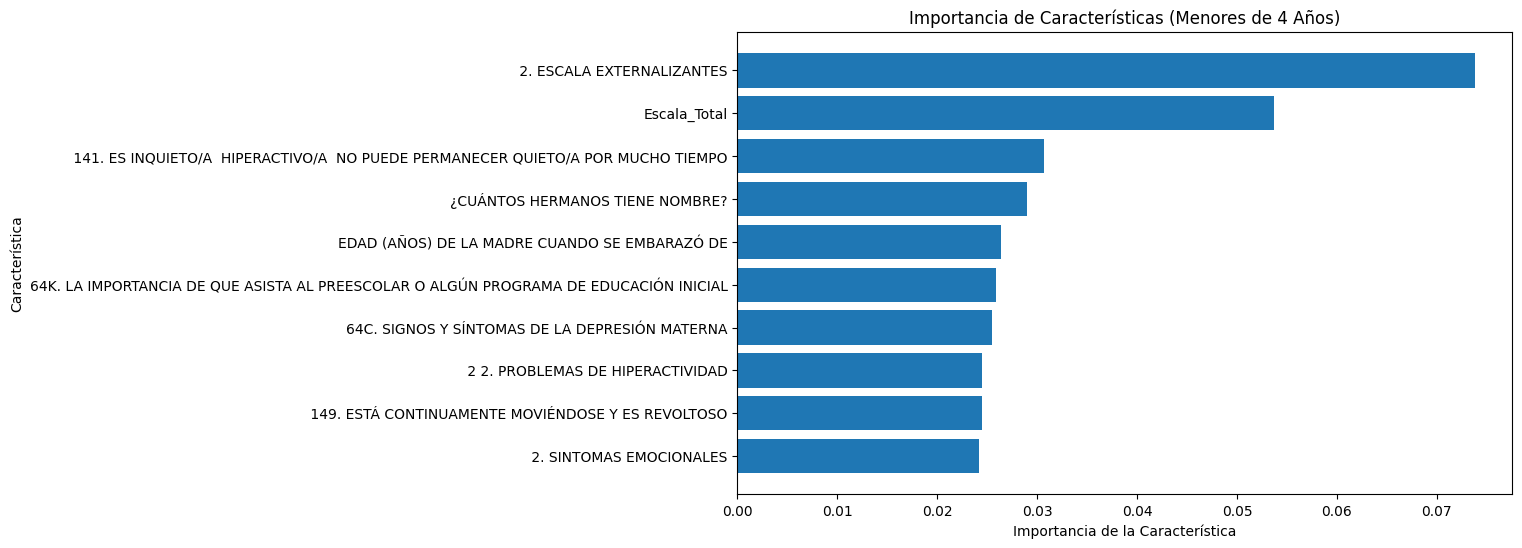

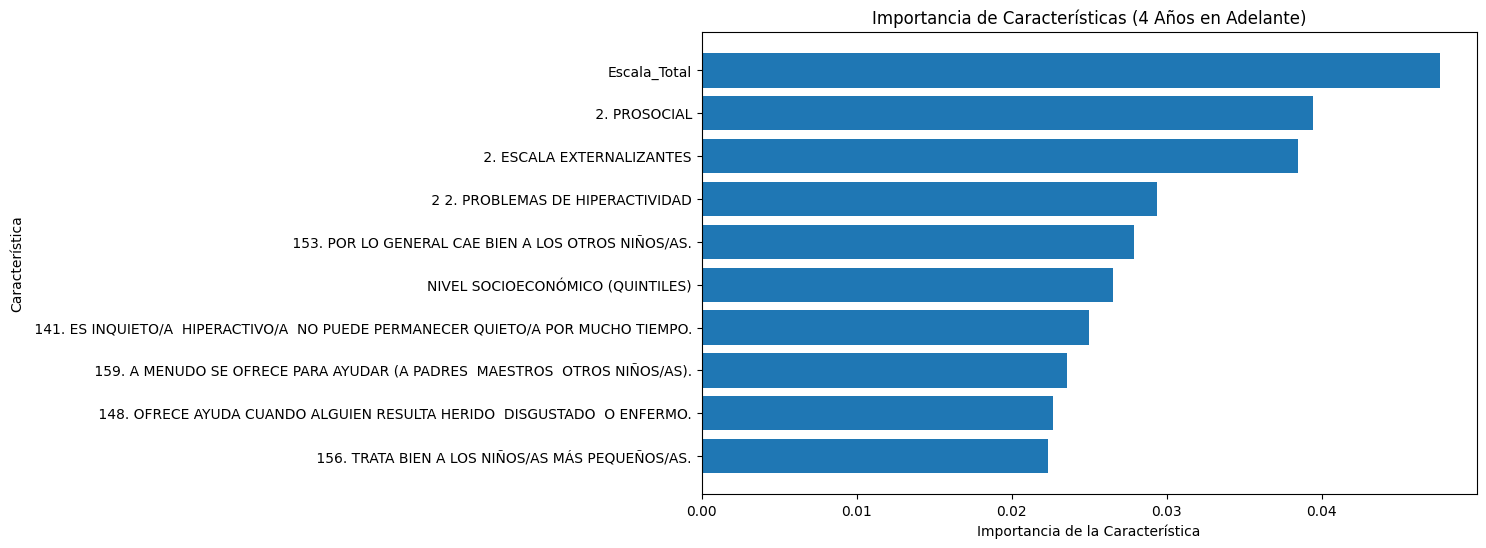

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de las características después de la codificación One-Hot y otros preprocesamientos
feature_names = np.array(X_train_m4.columns.tolist())

# Función para visualizar la importancia de las características
def plot_feature_importances(importances, feature_names, title):
    # Ordenar las importancias y sus índices
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = feature_names[indices]

    # Seleccionar las 10 características más importantes
    top_indices = indices[:10]
    top_importances = importances[top_indices]
    top_feature_names = sorted_feature_names[:10]

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(len(top_indices)), top_importances, align='center')
    plt.yticks(range(len(top_indices)), top_feature_names)
    plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
    plt.xlabel('Importancia de la Característica')
    plt.ylabel('Característica')
    plt.show()

# Visualizar la importancia de las características para menores de 4 años
plot_feature_importances(feature_importances_m4, feature_names, "Importancia de Características (Menores de 4 Años)")

# Visualizar la importancia de las características para niños de 4 años en adelante
plot_feature_importances(feature_importances_4m, feature_names, "Importancia de Características (4 Años en Adelante)")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Lista para almacenar los resultados de cada modelo
model_results = []

# Definir los modelos a entrenar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Ajustar el modelo al conjunto de entrenamiento para niños de 4 años en adelante (como ejemplo)
    model.fit(X_train_4m, y_train_4m)
    # Realizar predicciones en el conjunto de prueba
    predictions = model.predict(X_test_4m)
    # Calcular la precisión
    accuracy = accuracy_score(y_test_4m, predictions)
    # Almacenar los resultados
    model_results.append((name, accuracy))

# Ordenar los resultados por precisión de manera descendente
model_results.sort(key=lambda x: x[1], reverse=True)

# Mostrar los resultados
model_results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[('Logistic Regression', 0.7714285714285715),
 ('Random Forest', 0.7714285714285715),
 ('Decision Tree', 0.7428571428571429),
 ('Support Vector Machine', 0.7142857142857143),
 ('K-Nearest Neighbors', 0.7142857142857143),
 ('Gradient Boosting', 0.7142857142857143)]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
rf = RandomForestClassifier(random_state=0)

# Definir la cuadrícula de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurar la búsqueda en cuadrícula
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search_rf.fit(X_train_4m, y_train_4m)

# Mejores parámetros y puntuación
print("Mejores parámetros: ", grid_search_rf.best_params_)
print("Mejor puntuación: ", grid_search_rf.best_score_)

Mejores parámetros:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación:  0.7769841269841269


**Referencias:**

Galli, S. (2022, October). *Python Feature Engineering Cookbook - Second Edition*. Packt Publishing.

Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition*. O'Reilly Media, Inc.